#Data Preprocess

In [1]:
from google.colab import drive

drive.mount("/content/gdrive")
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', 100)
solution_df = pd.read_csv("gdrive/MyDrive/Dataset/wids/solution_template.csv")


train_df = pd.read_csv("gdrive/MyDrive/Dataset/wids/train.csv")
test_df = pd.read_csv("gdrive/MyDrive/Dataset/wids/test.csv")





Mounted at /content/gdrive


In [2]:
train_df.head(3)

,patient_id,patient_race,payer_type,patient_state,patient_zip3,Region,Division,patient_age,patient_gender,bmi,breast_cancer_diagnosis_code,breast_cancer_diagnosis_desc,metastatic_cancer_diagnosis_code,metastatic_first_novel_treatment,metastatic_first_novel_treatment_type,population,density,age_median,age_under_10,age_10_to_19,age_20s,age_30s,age_40s,age_50s,age_60s,age_70s,age_over_80,male,female,married,divorced,never_married,widowed,family_size,family_dual_income,income_household_median,income_household_under_5,income_household_5_to_10,income_household_10_to_15,income_household_15_to_20,income_household_20_to_25,income_household_25_to_35,income_household_35_to_50,income_household_50_to_75,income_household_75_to_100,income_household_100_to_150,income_household_150_over,income_household_six_figure,income_individual_median,home_ownership,...,Average of Dec-14,Average of Jan-15,Average of Feb-15,Average of Mar-15,Average of Apr-15,Average of May-15,Average of Jun-15,Average of Jul-15,Average of Aug-15,Average of Sep-15,Average of Oct-15,Average of Nov-15,Average of Dec-15,Average of Jan-16,Average of Feb-16,Average of Mar-16,Average of Apr-16,Average of May-16,Average of Jun-16,Average of Jul-16,Average of Aug-16,Average of Sep-16,Average of Oct-16,Average of Nov-16,Average of Dec-16,Average of Jan-17,Average of Feb-17,Average of Mar-17,Average of Apr-17,Average of May-17,Average of Jun-17,Average of Jul-17,Average of Aug-17,Average of Sep-17,Average of Oct-17,Average of Nov-17,Average of Dec-17,Average of Jan-18,Average of Feb-18,Average of Mar-18,Average of Apr-18,Average of May-18,Average of Jun-18,Average of Jul-18,Average of Aug-18,Average of Sep-18,Average of Oct-18,Average of Nov-18,Average of Dec-18,metastatic_diagnosis_period
0,268700,NaN,COMMERCIAL,AR,724,South,West South Central,39,F,NaN,C50912,Malignant neoplasm of unspecified site of left...,C773,NaN,NaN,3924.87,82.63,42.58,11.61,13.03,10.87,11.80,12.29,13.22,13.47,10.07,3.64,51.43,48.57,51.05,16.72,23.57,8.66,3.01,43.99,44483.35,2.21,3.97,8.52,7.08,7.67,13.82,15.14,17.51,11.26,8.90,3.93,12.83,24048.55,72.11,...,41.46,35.24,31.10,45.50,60.94,68.49,77.69,81.35,76.28,73.32,60.32,51.00,48.37,35.76,42.89,53.21,61.07,66.29,82.78,81.52,79.52,75.61,65.76,53.85,39.56,41.59,49.01,52.28,63.40,67.11,75.78,80.58,76.16,72.91,62.68,49.73,39.80,31.71,41.69,50.22,52.55,74.77,79.96,81.69,78.30,74.56,59.98,42.98,41.18,191
1,484983,White,NaN,IL,629,Midwest,East North Central,55,F,35.36,C50412,Malig neoplasm of upper-outer quadrant of left...,C773,NaN,NaN,2745.39,51.79,43.54,11.22,12.19,11.45,11.01,11.35,14.39,14.15,9.17,5.05,49.32,50.68,49.48,15.42,26.93,8.17,3.17,41.41,51796.79,3.67,3.86,6.58,5.58,5.38,11.02,13.09,19.56,11.76,11.40,8.11,19.51,28028.04,76.71,...,38.54,32.33,25.62,43.52,58.50,66.81,75.41,78.43,73.88,70.78,58.70,50.50,46.71,32.36,38.76,51.68,58.41,64.10,78.15,79.70,78.33,72.80,63.84,50.35,34.90,39.05,45.80,48.45,60.77,65.89,74.46,79.18,73.13,70.13,59.68,46.52,35.15,28.43,40.01,44.18,49.30,72.87,77.40,77.43,75.83,72.64,58.36,39.68,39.71,33
2,277055,NaN,COMMERCIAL,CA,925,West,Pacific,59,F,NaN,1749,"Malignant neoplasm of breast (female), unspeci...",C773,NaN,NaN,38343.18,700.34,36.28,13.27,15.66,13.49,13.45,12.40,11.58,10.47,6.38,3.28,49.99,50.01,48.81,11.90,34.35,4.95,3.80,52.89,78696.87,2.59,1.81,3.16,3.71,3.23,7.40,10.42,16.83,13.45,19.21,18.23,37.44,32818.54,66.82,...,56.28,58.32,62.97,67.61,67.39,68.06,80.43,80.98,85.08,82.01,75.16,59.59,53.24,54.54,63.52,63.72,67.45,69.58,82.02,84.83,84.06,77.85,72.50,64.24,55.52,53.54,58.18,65.45,68.51,71.13,80.71,85.64,84.85,78.14,74.03,65.70,59.28,60.34,57.43,60.97,68.50,70.31,78.61,87.24,85.52,80.75,70.81,62.67,55.58,157


In [3]:
test_df.head(3)

,patient_id,patient_race,payer_type,patient_state,patient_zip3,Region,Division,patient_age,patient_gender,bmi,breast_cancer_diagnosis_code,breast_cancer_diagnosis_desc,metastatic_cancer_diagnosis_code,metastatic_first_novel_treatment,metastatic_first_novel_treatment_type,population,density,age_median,age_under_10,age_10_to_19,age_20s,age_30s,age_40s,age_50s,age_60s,age_70s,age_over_80,male,female,married,divorced,never_married,widowed,family_size,family_dual_income,income_household_median,income_household_under_5,income_household_5_to_10,income_household_10_to_15,income_household_15_to_20,income_household_20_to_25,income_household_25_to_35,income_household_35_to_50,income_household_50_to_75,income_household_75_to_100,income_household_100_to_150,income_household_150_over,income_household_six_figure,income_individual_median,home_ownership,...,Average of Nov-14,Average of Dec-14,Average of Jan-15,Average of Feb-15,Average of Mar-15,Average of Apr-15,Average of May-15,Average of Jun-15,Average of Jul-15,Average of Aug-15,Average of Sep-15,Average of Oct-15,Average of Nov-15,Average of Dec-15,Average of Jan-16,Average of Feb-16,Average of Mar-16,Average of Apr-16,Average of May-16,Average of Jun-16,Average of Jul-16,Average of Aug-16,Average of Sep-16,Average of Oct-16,Average of Nov-16,Average of Dec-16,Average of Jan-17,Average of Feb-17,Average of Mar-17,Average of Apr-17,Average of May-17,Average of Jun-17,Average of Jul-17,Average of Aug-17,Average of Sep-17,Average of Oct-17,Average of Nov-17,Average of Dec-17,Average of Jan-18,Average of Feb-18,Average of Mar-18,Average of Apr-18,Average of May-18,Average of Jun-18,Average of Jul-18,Average of Aug-18,Average of Sep-18,Average of Oct-18,Average of Nov-18,Average of Dec-18
0,730681,NaN,COMMERCIAL,LA,713,South,West South Central,55,F,NaN,1746,Malignant neoplasm of axillary tail of female ...,C7981,NaN,NaN,4639.07,72.66,41.50,11.40,13.44,11.42,11.45,12.56,13.08,14.26,7.71,4.73,50.02,49.98,42.37,14.70,34.76,8.18,3.30,38.83,40643.61,6.77,5.02,9.93,7.53,6.36,11.54,12.60,12.70,11.60,9.53,6.43,15.97,22663.32,74.78,...,52.59,52.09,46.08,46.21,58.97,69.57,74.68,80.54,84.27,86.11,78.99,69.81,62.72,58.46,47.79,54.72,63.75,72.19,73.58,80.75,86.61,83.09,80.58,71.67,62.00,52.89,56.28,60.76,63.94,69.87,71.66,78.19,82.68,80.93,76.97,68.88,61.15,49.82,42.66,58.12,62.21,62.23,78.34,81.96,83.58,82.22,80.20,69.73,53.14,51.34
1,334212,Black,NaN,NC,283,South,South Atlantic,60,F,40.00,C50912,Malignant neoplasm of unspecified site of left...,C773,NaN,NaN,10875.30,217.91,39.64,11.23,13.72,15.01,12.02,11.58,11.77,12.77,8.52,3.41,51.33,48.67,44.14,13.28,34.62,7.96,3.33,42.57,49924.38,4.59,3.83,6.58,5.27,5.90,13.16,13.99,18.14,10.65,11.39,6.49,17.88,26495.64,67.09,...,47.82,46.06,41.02,36.88,53.32,62.65,71.13,80.07,81.51,78.66,74.25,61.83,56.03,57.19,40.54,45.32,58.82,60.88,68.38,80.50,82.77,84.21,78.16,65.16,56.42,45.52,47.71,53.46,55.10,69.36,73.91,76.61,81.56,79.72,74.17,64.97,52.08,44.83,37.80,54.41,48.63,58.14,77.26,80.05,82.88,82.09,78.85,64.60,50.57,48.10
2,571362,NaN,COMMERCIAL,TX,794,South,West South Central,54,F,32.33,1742,Malignant neoplasm of upper-inner quadrant of ...,C773,NaN,NaN,18716.73,1019.51,30.37,11.00,18.86,23.11,12.24,9.88,9.12,8.38,4.78,2.62,50.29,49.71,35.99,12.76,46.65,4.63,3.15,54.23,48238.92,6.12,4.73,6.70,4.86,6.21,11.19,13.28,16.98,10.42,11.80,7.68,19.48,25137.57,47.85,...,47.76,44.48,39.89,44.84,53.74,62.94,66.78,77.33,81.05,80.61,76.61,64.45,51.58,45.28,42.63,50.48,57.99,62.86,68.77,78.96,84.92,78.40,73.11,68.57,55.73,43.39,44.61,53.68,59.69,63.29,69.40,79.94,81.16,76.74,73.08,62.92,56.09,43.79,42.14,46.48,57.82,59.95,77.79,82.45,82.44,80.77,72.16,59.31,48.25,42.13


In [4]:
solution_df.head(3)

,patient_id,metastatic_diagnosis_period
0,730681,100
1,334212,0
2,571362,100


In [5]:
# Describing the data
train_df.describe()

,patient_id,patient_zip3,patient_age,bmi,population,density,age_median,age_under_10,age_10_to_19,age_20s,age_30s,age_40s,age_50s,age_60s,age_70s,age_over_80,male,female,married,divorced,never_married,widowed,family_size,family_dual_income,income_household_median,income_household_under_5,income_household_5_to_10,income_household_10_to_15,income_household_15_to_20,income_household_20_to_25,income_household_25_to_35,income_household_35_to_50,income_household_50_to_75,income_household_75_to_100,income_household_100_to_150,income_household_150_over,income_household_six_figure,income_individual_median,home_ownership,housing_units,home_value,rent_median,rent_burden,education_less_highschool,education_highschool,education_some_college,education_bachelors,education_graduate,education_college_or_above,education_stem_degree,...,Average of Dec-14,Average of Jan-15,Average of Feb-15,Average of Mar-15,Average of Apr-15,Average of May-15,Average of Jun-15,Average of Jul-15,Average of Aug-15,Average of Sep-15,Average of Oct-15,Average of Nov-15,Average of Dec-15,Average of Jan-16,Average of Feb-16,Average of Mar-16,Average of Apr-16,Average of May-16,Average of Jun-16,Average of Jul-16,Average of Aug-16,Average of Sep-16,Average of Oct-16,Average of Nov-16,Average of Dec-16,Average of Jan-17,Average of Feb-17,Average of Mar-17,Average of Apr-17,Average of May-17,Average of Jun-17,Average of Jul-17,Average of Aug-17,Average of Sep-17,Average of Oct-17,Average of Nov-17,Average of Dec-17,Average of Jan-18,Average of Feb-18,Average of Mar-18,Average of Apr-18,Average of May-18,Average of Jun-18,Average of Jul-18,Average of Aug-18,Average of Sep-18,Average of Oct-18,Average of Nov-18,Average of Dec-18,metastatic_diagnosis_period
count,13173.000000,13173.000000,13173.000000,4102.000000,13173.000000,13173.000000,13173.000000,13173.000000,13173.000000,13173.000000,13173.000000,13173.000000,13173.000000,13173.000000,13173.000000,13173.000000,13173.000000,13173.000000,13173.000000,13173.000000,13173.000000,13173.000000,13168.000000,13168.000000,13168.000000,13168.000000,13168.000000,13168.000000,13168.000000,13168.000000,13168.000000,13168.000000,13168.000000,13168.000000,13168.000000,13168.000000,13168.000000,13173.000000,13168.000000,13173.000000,1.316800e+04,13168.000000,13168.000000,13173.000000,13173.000000,13173.000000,13173.000000,13173.000000,13173.000000,13173.000000,...,13173.000000,13167.000000,13161.000000,13161.00000,13145.000000,13173.000000,13173.000000,13173.000000,13151.000000,13173.000000,13157.000000,13157.000000,13155.000000,13157.000000,13157.000000,13173.000000,13173.000000,13154.000000,13173.000000,13157.000000,13173.000000,13173.000000,13173.000000,13170.000000,13160.000000,13164.000000,13173.000000,13173.000000,13173.000000,13173.000000,13172.000000,13142.000000,13173.000000,13163.000000,13152.000000,13168.000000,13173.000000,13173.000000,13168.000000,13167.000000,13173.000000,13173.000000,13164.000000,13127.000000,13157.000000,13166.000000,13166.000000,13161.000000,13140.000000,13173.000000
mean,555441.784939,568.530859,59.271313,29.168808,20651.373928,1776.872376,40.542676,11.104988,12.857587,13.297375,12.893557,12.063957,13.458827,12.631076,7.670396,4.021445,50.094310,49.905878,47.645569,12.688142,33.819417,5.846155,3.196401,51.800184,74149.173616,3.286397,2.535715,4.159681,3.943212,4.081337,8.428095,11.586349,16.906539,12.671315,15.806551,16.595873,32.402666,36606.228237,65.895238,7589.209077,3.373791e+05,1230.443146,31.233619,11.933390,27.687036,28.874659,19.263585,12.243182,31.506428,43.302040,...,42.954875,36.974767,34.759469,47.52108,57.004955,65.244507,72.620689,75.560679,75.125510,72.271894,61.211773,51.595938,47.010274,37.472639,43.529698,51.631609,56.419806,63.375224,73.644230,77.270195,76.562339,71.436420,61.991704,52.612660,40.281865,40.719157,46.279066,48.901873,59.008388,63.444372,72.434105,76.757869,73.938746,70.144358,61.822501,49.864691,40.152299,36.800997,43.061795,46.074308,52.411982,67.932236,73.074635,77

In [6]:
!pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 MB 8.0 MB/s eta 0:00:00


In [7]:
# Importing required library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import math
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, ExtraTreesRegressor
from sklearn.neural_network import MLPRegressor
import time
from scipy.stats import linregress


#Data Preprocessing

- Remove columns having high count of null values
- Remove patients gender
- Replacing the null values

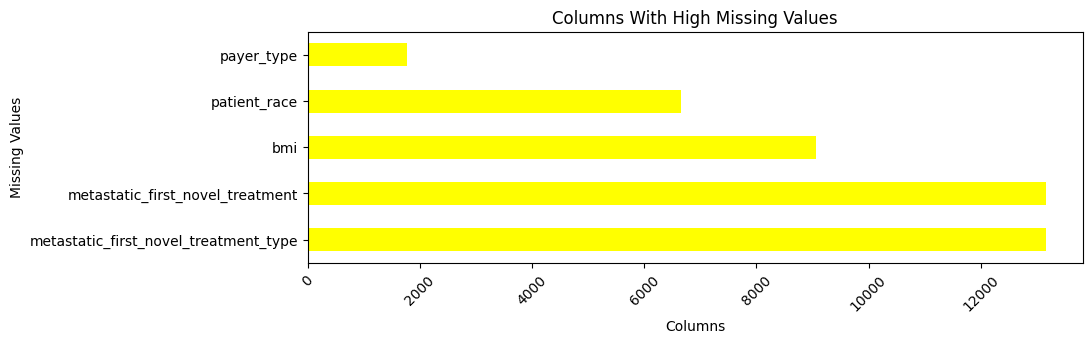

In [8]:
# Display Columns that contains high missing values
plt.figure(figsize = (10,3))
missing_values = train_df.isna().sum().sort_values(ascending = False)
missing_values.head(5).plot(kind = 'barh', color = 'yellow')
plt.title('Columns With High Missing Values')
plt.xlabel('Columns')
plt.xticks(rotation = 45)
plt.ylabel('Missing Values')
plt.show()

In [9]:
# Dropping Columns that Contains high missing values
df = train_df.drop(['metastatic_first_novel_treatment','metastatic_first_novel_treatment_type', 'patient_gender'],axis = 1)
test_df = test_df.drop(['metastatic_first_novel_treatment','metastatic_first_novel_treatment_type', 'patient_gender'],axis = 1)

In [10]:
# Fixing zip that are bad
df['patient_state'] = np.where(df['patient_zip3'] == 630, 'MO', np.where(df['patient_zip3'] == 864,'AZ', df['patient_state']))
# test_df['patient_state'] = np.where(df['patient_zip3'] == 630, 'MO', np.where(df['patient_zip3'] == 864,'AZ', df['patient_state']))
# Male Code to female
df['breast_cancer_diagnosis_code'] = df['breast_cancer_diagnosis_code'].replace({
    'C50122':'C50112', 'C50221':'C50211', 'C50421':'C50411', 'C509':'C5091', 'C50922':'C50912'
})

# Fixing code in test data frame
test_df['breast_cancer_diagnosis_code'] = test_df['breast_cancer_diagnosis_code'].replace({
    'C50122':'C50112', 'C50221':'C50211', 'C50421':'C50411', 'C509':'C5091', 'C50922':'C50912'

})
# Recode categories in test data
test_df['breast_cancer_diagnosis_code'] = test_df['breast_cancer_diagnosis_code'].replace({'C5021':'C50219'})

In [11]:
# population cols
pop_cols = df.loc[:, 'population':'veteran'].columns.to_list()

In [12]:
# Correcting Outliers from the data
df.loc[df.patient_id == 441322, pop_cols] = df.loc[df.patient_id == 982003, pop_cols].values
df.loc[df.patient_id == 271422, pop_cols] = df.loc[df.patient_id == 271245, pop_cols].values
df.loc[df.patient_id == 714510, pop_cols] = df.loc[df.patient_id == 636245, pop_cols].values
df.head()

,patient_id,patient_race,payer_type,patient_state,patient_zip3,Region,Division,patient_age,bmi,breast_cancer_diagnosis_code,breast_cancer_diagnosis_desc,metastatic_cancer_diagnosis_code,population,density,age_median,age_under_10,age_10_to_19,age_20s,age_30s,age_40s,age_50s,age_60s,age_70s,age_over_80,male,female,married,divorced,never_married,widowed,family_size,family_dual_income,income_household_median,income_household_under_5,income_household_5_to_10,income_household_10_to_15,income_household_15_to_20,income_household_20_to_25,income_household_25_to_35,income_household_35_to_50,income_household_50_to_75,income_household_75_to_100,income_household_100_to_150,income_household_150_over,income_household_six_figure,income_individual_median,home_ownership,housing_units,home_value,rent_median,...,Average of Dec-14,Average of Jan-15,Average of Feb-15,Average of Mar-15,Average of Apr-15,Average of May-15,Average of Jun-15,Average of Jul-15,Average of Aug-15,Average of Sep-15,Average of Oct-15,Average of Nov-15,Average of Dec-15,Average of Jan-16,Average of Feb-16,Average of Mar-16,Average of Apr-16,Average of May-16,Average of Jun-16,Average of Jul-16,Average of Aug-16,Average of Sep-16,Average of Oct-16,Average of Nov-16,Average of Dec-16,Average of Jan-17,Average of Feb-17,Average of Mar-17,Average of Apr-17,Average of May-17,Average of Jun-17,Average of Jul-17,Average of Aug-17,Average of Sep-17,Average of Oct-17,Average of Nov-17,Average of Dec-17,Average of Jan-18,Average of Feb-18,Average of Mar-18,Average of Apr-18,Average of May-18,Average of Jun-18,Average of Jul-18,Average of Aug-18,Average of Sep-18,Average of Oct-18,Average of Nov-18,Average of Dec-18,metastatic_diagnosis_period
0,268700,NaN,COMMERCIAL,AR,724,South,West South Central,39,NaN,C50912,Malignant neoplasm of unspecified site of left...,C773,3924.87,82.63,42.58,11.61,13.03,10.87,11.80,12.29,13.22,13.47,10.07,3.64,51.43,48.57,51.05,16.72,23.57,8.66,3.01,43.99,44483.35,2.21,3.97,8.52,7.08,7.67,13.82,15.14,17.51,11.26,8.90,3.93,12.83,24048.55,72.11,1513.75,87384.33,641.39,...,41.46,35.24,31.10,45.50,60.94,68.49,77.69,81.35,76.28,73.32,60.32,51.00,48.37,35.76,42.89,53.21,61.07,66.29,82.78,81.52,79.52,75.61,65.76,53.85,39.56,41.59,49.01,52.28,63.40,67.11,75.78,80.58,76.16,72.91,62.68,49.73,39.80,31.71,41.69,50.22,52.55,74.77,79.96,81.69,78.30,74.56,59.98,42.98,41.18,191
1,484983,White,NaN,IL,629,Midwest,East North Central,55,35.36,C50412,Malig neoplasm of upper-outer quadrant of left...,C773,2745.39,51.79,43.54,11.22,12.19,11.45,11.01,11.35,14.39,14.15,9.17,5.05,49.32,50.68,49.48,15.42,26.93,8.17,3.17,41.41,51796.79,3.67,3.86,6.58,5.58,5.38,11.02,13.09,19.56,11.76,11.40,8.11,19.51,28028.04,76.71,1113.35,92026.84,638.60,...,38.54,32.33,25.62,43.52,58.50,66.81,75.41,78.43,73.88,70.78,58.70,50.50,46.71,32.36,38.76,51.68,58.41,64.10,78.15,79.70,78.33,72.80,63.84,50.35,34.90,39.05,45.80,48.45,60.77,65.89,74.46,79.18,73.13,70.13,59.68,46.52,35.15,28.43,40.01,44.18,49.30,72.87,77.40,77.43,75.83,72.64,58.36,39.68,39.71,33
2,277055,NaN,COMMERCIAL,CA,925,West,Pacific,59,NaN,1749,"Malignant neoplasm of breast (female), unspeci...",C773,38343.18,700.34,36.28,13.27,15.66,13.49,13.45,12.40,11.58,10.47,6.38,3.28,49.99,50.01,48.81,11.90,34.35,4.95,3.80,52.89,78696.87,2.59,1.81,3.16,3.71,3.23,7.40,10.42,16.83,13.45,19.21,18.23,37.44,32818.54,66.82,10825.83,392600.40,1631.64,...,56.28,58.32,62.97,67.61,67.39,68.06,80.43,80.98,85.08,82.01,75.16,59.59,53.24,54.54,63.52,63.72,67.45,69.58,82.02,84.83,84.06,77.85,72.50,64.24,55.52,53.54,58.18,65.45,68.51,71.13,80.71,85.64,84.85,78.14,74.03,65.70,59.28,60.34,57.43,60.97,68.50,70.31,78.61,87.24,85.52,80.75,70.81,62.67,55.58,157
3,320055,Hispanic,MEDICAID,CA,900,West,Pacific,59,NaN,C50911,Malignant neoplasm of unsp site of right femal...,C773,36054.12,5294.33,36.65,9.76,11.27,17.23,17.44,13.09,12.30,9.41,5.67,3.82,50.51,49.49,33.48,11.30,50.46,4.77,3.44,55.53,69266.69,6.32,2.95,6.81,4.18,4.13,7.84,10.16,14.42,10.48,13.73,18.96,32.69,36053.40

In [13]:
# categorizing age variables
df['patient_age'] = pd.cut(df['patient_age'],right = False, bins = [0,30,40,50,60,70,80,90,np.inf], labels = [0,1,2,3,4,5,6,7]).astype(int)

In [14]:
# convert bmi to categorical
def convert_bmi(x):

    #if bmi is missing
    if(math.isnan(x)):
        return 0

    # if bmi < 18.5 underweight
    elif x<18.5:
        return 1

    # if bmi <=18.5 and bmi>25 normal
    elif x >=18.5 and x <25:
        return 2

    # if bmi <=25 and bmi>30 Overweight
    elif x >=25 and x <30:
        return 3

    # if bmi <=18.5 and bmi>25 normal
    elif x >=30:
        return 4

In [15]:
# converting bmi to categorical
df['bmi'] = df['bmi'].apply(lambda x: convert_bmi(x))

In [16]:
# Replacing patient race with most frequent value at zip and then at state,
def impute_patient_race(df):
    most_frequent_race_zip = df.groupby('patient_zip3')['patient_race'].agg(lambda x: x.mode().iloc[0] if not x.mode().empty else None)
    most_frequent_race_state = df.groupby('patient_state')['patient_race'].agg(lambda x: x.mode().iloc[0] if not x.mode().empty else None)

    df['patient_race'] = df.apply(lambda row: most_frequent_race_zip[row['patient_zip3']] if pd.isna(row['patient_race']) else row['patient_race'], axis = 1)
    df['patient_race'] = df.apply(lambda row: most_frequent_race_state[row['patient_state']] if pd.isna(row['patient_race']) else row['patient_race'], axis = 1)

    return df

df = impute_patient_race(df)

In [17]:
# imputing payer type with most frequent value at zip then at state
# Replacing patient race with most frequent value at zip and then at state,
def impute_patient_payer(df):
    most_frequent_race_zip = df.groupby('patient_zip3')['payer_type'].agg(lambda x: x.mode().iloc[0] if not x.mode().empty else None)
    most_frequent_race_state = df.groupby('patient_state')['payer_type'].agg(lambda x: x.mode().iloc[0] if not x.mode().empty else None)

    df['payer_type'] = df.apply(lambda row: most_frequent_race_zip[row['patient_zip3']] if pd.isna(row['payer_type']) else row['payer_type'], axis = 1)
    df['payer_type'] = df.apply(lambda row: most_frequent_race_state[row['patient_state']] if pd.isna(row['payer_type']) else row['payer_type'], axis = 1)

    return df

df = impute_patient_payer(df)


In [18]:
# dropping nan values that are less in numbers
df = df.dropna()

#Visualizations

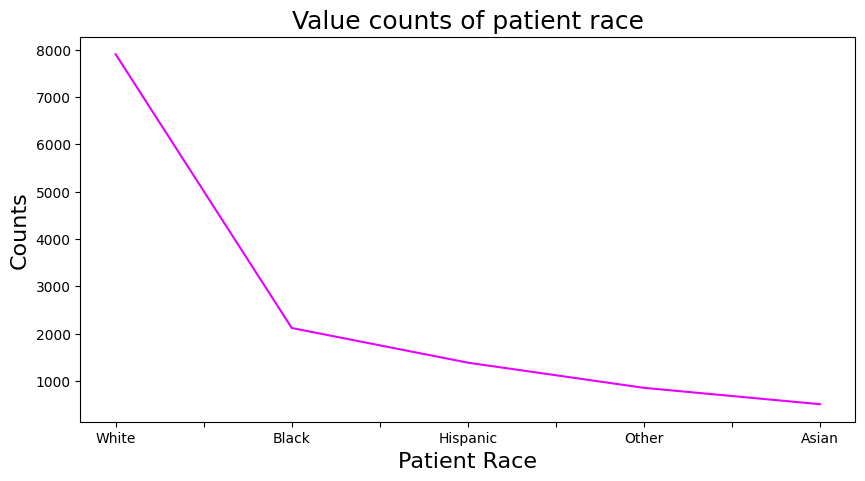

In [19]:
# comparing patient race
plt.figure(figsize = (10,5))
df['patient_race'].value_counts().plot(kind = 'line', color =  '#E800FF')
plt.title("Value counts of patient race", fontsize = 18)
plt.xlabel('Patient Race', fontsize = 16)
plt.ylabel('Counts', fontsize = 16)
plt.xticks(rotation = 0)
plt.show()

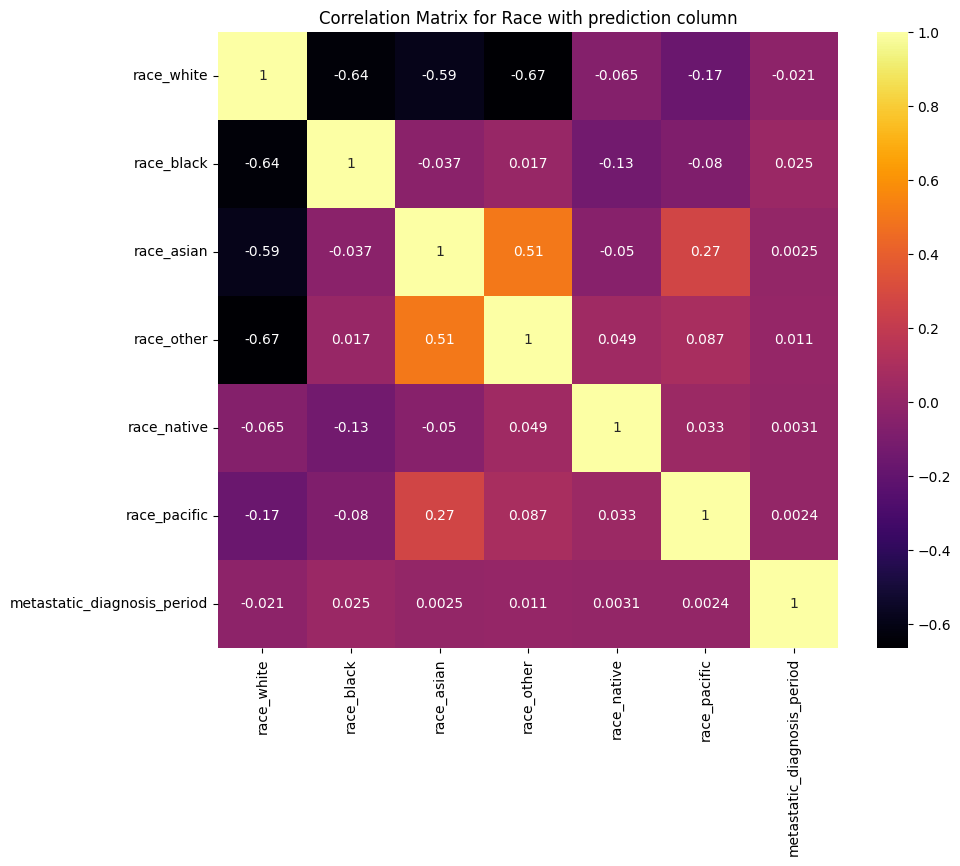

In [20]:
correlation_matrix = train_df[['race_white', 'race_black', 'race_asian','race_other', 'race_native','race_pacific','metastatic_diagnosis_period']].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='inferno')
plt.title('Correlation Matrix for Race with prediction column')
plt.show()


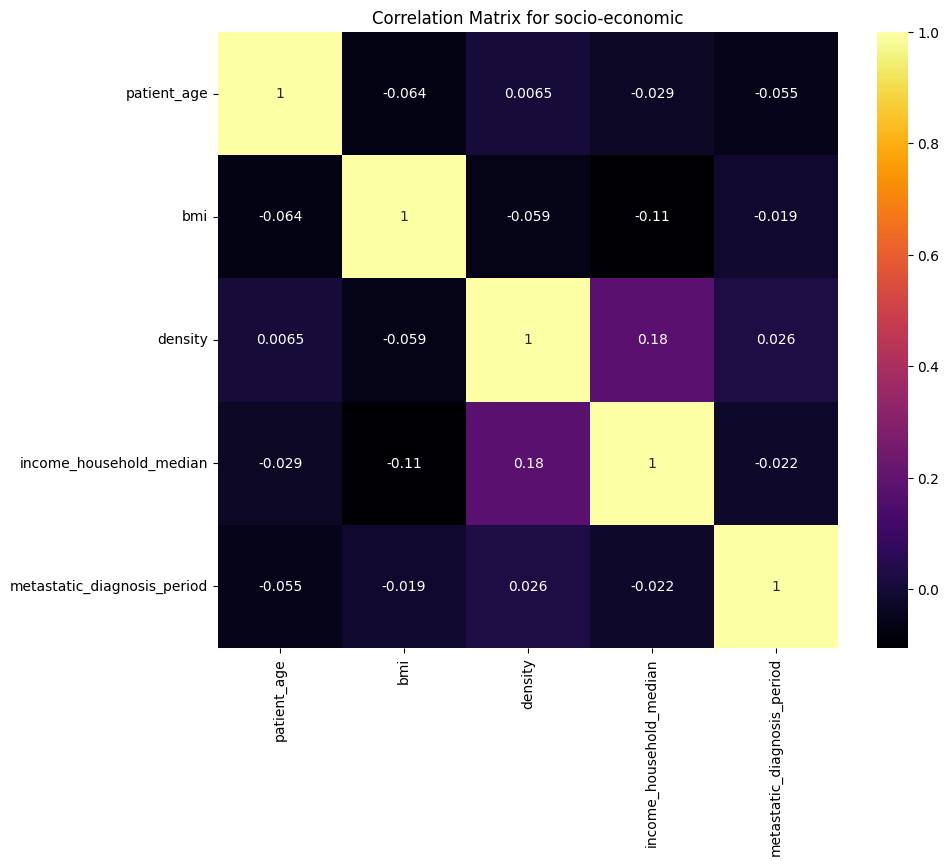

In [21]:
correlation_matrix = train_df[['patient_age', 'bmi', 'density','income_household_median', 'metastatic_diagnosis_period']].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='inferno')
plt.title('Correlation Matrix for socio-economic')
plt.show()

#Selecting Features

In [22]:
# dropping columns that are not required and spearating the data into feature variable and class
X = df.drop(['patient_id', 'patient_race', 'bmi', 'breast_cancer_diagnosis_desc', 'metastatic_diagnosis_period'], axis = 1)
y = df['metastatic_diagnosis_period']

# printing shape of X and shape of y
print(X.shape, y.shape)

X.head()

(12762, 144) (12762,)


,payer_type,patient_state,patient_zip3,Region,Division,patient_age,breast_cancer_diagnosis_code,metastatic_cancer_diagnosis_code,population,density,age_median,age_under_10,age_10_to_19,age_20s,age_30s,age_40s,age_50s,age_60s,age_70s,age_over_80,male,female,married,divorced,never_married,widowed,family_size,family_dual_income,income_household_median,income_household_under_5,income_household_5_to_10,income_household_10_to_15,income_household_15_to_20,income_household_20_to_25,income_household_25_to_35,income_household_35_to_50,income_household_50_to_75,income_household_75_to_100,income_household_100_to_150,income_household_150_over,income_household_six_figure,income_individual_median,home_ownership,housing_units,home_value,rent_median,rent_burden,education_less_highschool,education_highschool,education_some_college,...,Average of Nov-14,Average of Dec-14,Average of Jan-15,Average of Feb-15,Average of Mar-15,Average of Apr-15,Average of May-15,Average of Jun-15,Average of Jul-15,Average of Aug-15,Average of Sep-15,Average of Oct-15,Average of Nov-15,Average of Dec-15,Average of Jan-16,Average of Feb-16,Average of Mar-16,Average of Apr-16,Average of May-16,Average of Jun-16,Average of Jul-16,Average of Aug-16,Average of Sep-16,Average of Oct-16,Average of Nov-16,Average of Dec-16,Average of Jan-17,Average of Feb-17,Average of Mar-17,Average of Apr-17,Average of May-17,Average of Jun-17,Average of Jul-17,Average of Aug-17,Average of Sep-17,Average of Oct-17,Average of Nov-17,Average of Dec-17,Average of Jan-18,Average of Feb-18,Average of Mar-18,Average of Apr-18,Average of May-18,Average of Jun-18,Average of Jul-18,Average of Aug-18,Average of Sep-18,Average of Oct-18,Average of Nov-18,Average of Dec-18
0,COMMERCIAL,AR,724,South,West South Central,1,C50912,C773,3924.87,82.63,42.58,11.61,13.03,10.87,11.80,12.29,13.22,13.47,10.07,3.64,51.43,48.57,51.05,16.72,23.57,8.66,3.01,43.99,44483.35,2.21,3.97,8.52,7.08,7.67,13.82,15.14,17.51,11.26,8.90,3.93,12.83,24048.55,72.11,1513.75,87384.33,641.39,27.52,16.55,41.83,28.31,...,41.89,41.46,35.24,31.10,45.50,60.94,68.49,77.69,81.35,76.28,73.32,60.32,51.00,48.37,35.76,42.89,53.21,61.07,66.29,82.78,81.52,79.52,75.61,65.76,53.85,39.56,41.59,49.01,52.28,63.40,67.11,75.78,80.58,76.16,72.91,62.68,49.73,39.80,31.71,41.69,50.22,52.55,74.77,79.96,81.69,78.30,74.56,59.98,42.98,41.18
1,COMMERCIAL,IL,629,Midwest,East North Central,3,C50412,C773,2745.39,51.79,43.54,11.22,12.19,11.45,11.01,11.35,14.39,14.15,9.17,5.05,49.32,50.68,49.48,15.42,26.93,8.17,3.17,41.41,51796.79,3.67,3.86,6.58,5.58,5.38,11.02,13.09,19.56,11.76,11.40,8.11,19.51,28028.04,76.71,1113.35,92026.84,638.60,29.37,10.93,35.26,35.33,...,38.55,38.54,32.33,25.62,43.52,58.50,66.81,75.41,78.43,73.88,70.78,58.70,50.50,46.71,32.36,38.76,51.68,58.41,64.10,78.15,79.70,78.33,72.80,63.84,50.35,34.90,39.05,45.80,48.45,60.77,65.89,74.46,79.18,73.13,70.13,59.68,46.52,35.15,28.43,40.01,44.18,49.30,72.87,77.40,77.43,75.83,72.64,58.36,39.68,39.71
2,COMMERCIAL,CA,925,West,Pacific,3,1749,C773,38343.18,700.34,36.28,13.27,15.66,13.49,13.45,12.40,11.58,10.47,6.38,3.28,49.99,50.01,48.81,11.90,34.35,4.95,3.80,52.89,78696.87,2.59,1.81,3.16,3.71,3.23,7.40,10.42,16.83,13.45,19.21,18.23,37.44,32818.54,66.82,10825.83,392600.40,1631.64,35.56,16.25,27.55,33.88,...,63.29,56.28,58.32,62.97,67.61,67.39,68.06,80.43,80.98,85.08,82.01,75.16,59.59,53.24,54.54,63.52,63.72,67.45,69.58,82.02,84.83,84.06,77.85,72.50,64.24,55.52,53.54,58.18,65.45,68.51,71.13,80.71,85.64,84.85,78.14,74.03,65.70,59.28,60.34,57.43,60.97,68.50,70.31,78.61,87.24,85.52,80.75,70.81,62.67,55.58
3,MEDICAID,CA,900,West,Pacific,3,C50911,C773,36054.12,5294.33,36.65,9.76,11.27,17.23,17.44,13.09,12.30,9.41,5.67,3.82,50.51,49.49,33.48,11.30,50.46,4.77,3.44,55.53,69266.69,6.32,2.95,6.81,4.18,4.13,7.84,10.16,14.42,10.48,13.73,18.96,32.69,36053.40,31.50,12949.12,873756.00,1651.15,37.37,22.92,18.24,21.27,...,67.04,59.73,63.27,63.83,67.72,64.39,62.56,69.66,72.21,77.47,76.77,74.50,63.48,57.98,57.69,66.53,61.89,64.86,62.6

In [23]:
numerical_cols = X.select_dtypes(exclude=['object']).columns
categorical_columns = X.select_dtypes(include=['object']).columns

In [24]:
categorical_columns

Index(['payer_type', 'patient_state', 'Region', 'Division',
       'breast_cancer_diagnosis_code', 'metastatic_cancer_diagnosis_code'],
      dtype='object')

#Handling Categorical Values

- Use Label encoder to convert categorical values to way the model can understand
-Label Encoding is a technique that is used to convert categorical columns into numerical ones so that they can be fitted by machine learning models which only take numerical data. It is an important pre-processing step in a machine-learning project.
- eg array["apple","mango","guava"] = array[0,1,2]

In [25]:

# converting categorical features to numerical features
# make an object of LabelEncoder for each categorical features
le_payer_type = LabelEncoder()
le_patient_state = LabelEncoder()
le_patient_zip3 = LabelEncoder()
le_region = LabelEncoder()
le_division = LabelEncoder()
le_breast_cancer = LabelEncoder()
le_metastatic_cancer = LabelEncoder()

# converting categorical features to numerical
X['payer_type'] = le_payer_type.fit_transform(X['payer_type'])
X['patient_state'] = le_patient_state.fit_transform(X['patient_state'])
X['patient_zip3'] = le_patient_zip3.fit_transform(X['patient_zip3'])
X['Region'] = le_region.fit_transform(X['Region'])
X['Division'] = le_division.fit_transform(X['Division'])
X['breast_cancer_diagnosis_code'] = le_breast_cancer.fit_transform(X['breast_cancer_diagnosis_code'])
X['metastatic_cancer_diagnosis_code'] = le_metastatic_cancer.fit_transform(X['metastatic_cancer_diagnosis_code'])

In [26]:
X.head()

,payer_type,patient_state,patient_zip3,Region,Division,patient_age,breast_cancer_diagnosis_code,metastatic_cancer_diagnosis_code,population,density,age_median,age_under_10,age_10_to_19,age_20s,age_30s,age_40s,age_50s,age_60s,age_70s,age_over_80,male,female,married,divorced,never_married,widowed,family_size,family_dual_income,income_household_median,income_household_under_5,income_household_5_to_10,income_household_10_to_15,income_household_15_to_20,income_household_20_to_25,income_household_25_to_35,income_household_35_to_50,income_household_50_to_75,income_household_75_to_100,income_household_100_to_150,income_household_150_over,income_household_six_figure,income_individual_median,home_ownership,housing_units,home_value,rent_median,rent_burden,education_less_highschool,education_highschool,education_some_college,...,Average of Nov-14,Average of Dec-14,Average of Jan-15,Average of Feb-15,Average of Mar-15,Average of Apr-15,Average of May-15,Average of Jun-15,Average of Jul-15,Average of Aug-15,Average of Sep-15,Average of Oct-15,Average of Nov-15,Average of Dec-15,Average of Jan-16,Average of Feb-16,Average of Mar-16,Average of Apr-16,Average of May-16,Average of Jun-16,Average of Jul-16,Average of Aug-16,Average of Sep-16,Average of Oct-16,Average of Nov-16,Average of Dec-16,Average of Jan-17,Average of Feb-17,Average of Mar-17,Average of Apr-17,Average of May-17,Average of Jun-17,Average of Jul-17,Average of Aug-17,Average of Sep-17,Average of Oct-17,Average of Nov-17,Average of Dec-17,Average of Jan-18,Average of Feb-18,Average of Mar-18,Average of Apr-18,Average of May-18,Average of Jun-18,Average of Jul-18,Average of Aug-18,Average of Sep-18,Average of Oct-18,Average of Nov-18,Average of Dec-18
0,0,2,515,2,7,1,40,3,3924.87,82.63,42.58,11.61,13.03,10.87,11.80,12.29,13.22,13.47,10.07,3.64,51.43,48.57,51.05,16.72,23.57,8.66,3.01,43.99,44483.35,2.21,3.97,8.52,7.08,7.67,13.82,15.14,17.51,11.26,8.90,3.93,12.83,24048.55,72.11,1513.75,87384.33,641.39,27.52,16.55,41.83,28.31,...,41.89,41.46,35.24,31.10,45.50,60.94,68.49,77.69,81.35,76.28,73.32,60.32,51.00,48.37,35.76,42.89,53.21,61.07,66.29,82.78,81.52,79.52,75.61,65.76,53.85,39.56,41.59,49.01,52.28,63.40,67.11,75.78,80.58,76.16,72.91,62.68,49.73,39.80,31.71,41.69,50.22,52.55,74.77,79.96,81.69,78.30,74.56,59.98,42.98,41.18
1,0,13,446,0,0,3,26,3,2745.39,51.79,43.54,11.22,12.19,11.45,11.01,11.35,14.39,14.15,9.17,5.05,49.32,50.68,49.48,15.42,26.93,8.17,3.17,41.41,51796.79,3.67,3.86,6.58,5.58,5.38,11.02,13.09,19.56,11.76,11.40,8.11,19.51,28028.04,76.71,1113.35,92026.84,638.60,29.37,10.93,35.26,35.33,...,38.55,38.54,32.33,25.62,43.52,58.50,66.81,75.41,78.43,73.88,70.78,58.70,50.50,46.71,32.36,38.76,51.68,58.41,64.10,78.15,79.70,78.33,72.80,63.84,50.35,34.90,39.05,45.80,48.45,60.77,65.89,74.46,79.18,73.13,70.13,59.68,46.52,35.15,28.43,40.01,44.18,49.30,72.87,77.40,77.43,75.83,72.64,58.36,39.68,39.71
2,0,4,664,3,4,3,7,3,38343.18,700.34,36.28,13.27,15.66,13.49,13.45,12.40,11.58,10.47,6.38,3.28,49.99,50.01,48.81,11.90,34.35,4.95,3.80,52.89,78696.87,2.59,1.81,3.16,3.71,3.23,7.40,10.42,16.83,13.45,19.21,18.23,37.44,32818.54,66.82,10825.83,392600.40,1631.64,35.56,16.25,27.55,33.88,...,63.29,56.28,58.32,62.97,67.61,67.39,68.06,80.43,80.98,85.08,82.01,75.16,59.59,53.24,54.54,63.52,63.72,67.45,69.58,82.02,84.83,84.06,77.85,72.50,64.24,55.52,53.54,58.18,65.45,68.51,71.13,80.71,85.64,84.85,78.14,74.03,65.70,59.28,60.34,57.43,60.97,68.50,70.31,78.61,87.24,85.52,80.75,70.81,62.67,55.58
3,1,4,641,3,4,3,39,3,36054.12,5294.33,36.65,9.76,11.27,17.23,17.44,13.09,12.30,9.41,5.67,3.82,50.51,49.49,33.48,11.30,50.46,4.77,3.44,55.53,69266.69,6.32,2.95,6.81,4.18,4.13,7.84,10.16,14.42,10.48,13.73,18.96,32.69,36053.40,31.50,12949.12,873756.00,1651.15,37.37,22.92,18.24,21.27,...,67.04,59.73,63.27,63.83,67.72,64.39,62.56,69.66,72.21,77.47,76.77,74.50,63.48,57.98,57.69,66.53,61.89,64.86,62.63,70.45,73.09,71.94,72.26,69.56,66.85,58.29,56.08,57.88,63.84,65.03,63.90,68.95,73.58,73.62,72.88,73.84,68.87,66.63,63.75,59.8

In [27]:
# splitting the data into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, shuffle = True, stratify = y)
print("Training Size : ", X_train.shape)
print("Testing Size : ", X_test.shape)


Training Size :  (10209, 144)
Testing Size :  (2553, 144)


#Scaling the values
- makes the mean 0 of entire column.

In [28]:
# standardizing data
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)


In [56]:
# Initializing Random Forest with paramters
rf = RandomForestRegressor(n_estimators = 100, random_state = 42)

# Fitting the random forest to training data
rf.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [30]:
# Get important features
feature_importance = rf.feature_importances_


In [54]:
feature_importance

array([0.52547983, 0.06018205, 0.05993029, 0.03182522, 0.04075062,
       0.03497099, 0.03593592, 0.03455764, 0.0351458 , 0.0356157 ,
       0.03511388, 0.03643314, 0.03405891])

In [31]:
# Sort feature importances
sorted_indices = feature_importance.argsort()[::-1]


In [32]:
# Get the selected features based on importance
num_features_to_select = 13 # Specify the number of features you want to select
selected_features_indices = sorted_indices[:num_features_to_select]
selected_features = X_train.columns[selected_features_indices]

In [33]:
# Transform training and testing data to contain only the selected features
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]


In [34]:
rf.fit(X_train_selected, y_train)

# Evaluate the model on the testing data
accuracy = rf.score(X_test_selected, y_test)

# Print the selected features and model performance
print("Selected Features:", selected_features)
print("Accuracy on Testing Data:",accuracy)

Selected Features: Index(['breast_cancer_diagnosis_code', 'patient_age',
       'metastatic_cancer_diagnosis_code', 'payer_type', 'patient_zip3',
       'commute_time', 'age_40s', 'education_stem_degree',
       'income_household_75_to_100', 'rent_burden',
       'income_household_50_to_75', 'age_over_80', 'age_10_to_19'],
      dtype='object')
Accuracy on Testing Data: 0.30683743071068537


In [35]:
# Defining RMSE for evaluation
def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))


In [36]:
rmse(y_test, rf.predict(X_test_selected))


90.39762265330889

In [37]:
params={'learning_rate': 0.07549063239499854,
 'depth': 4,
 'subsample': 0.8801421770742517,
 'colsample_bylevel': 0.26256052069933244,
 'min_data_in_leaf': 64,
 'random_state':42,
  'verbose':False,
  'eval_metric':'RMSE'}

In [38]:
# Fit initial model
ctb_full = CatBoostRegressor(
    random_state=42,
    verbose=False,
    eval_metric='RMSE'
).fit(X_train, y_train, eval_set=(X_test, y_test), use_best_model=True)

rmse(y_test, ctb_full.predict(X_test))


84.4483613162745

In [39]:
# 1. CatBoost(on selected features)
ctb = CatBoostRegressor(
      random_state=42,
    verbose=False,
    eval_metric='RMSE'
).fit(X_train_selected, y_train, eval_set=(X_test_selected, y_test), use_best_model=True)

y_pred_ctb = rmse(y_test, ctb.predict(X_test_selected))

In [40]:
y_pred_ctb

84.0478188508882

In [41]:
# Printing Test Data
test_df.head()

,patient_id,patient_race,payer_type,patient_state,patient_zip3,Region,Division,patient_age,bmi,breast_cancer_diagnosis_code,breast_cancer_diagnosis_desc,metastatic_cancer_diagnosis_code,population,density,age_median,age_under_10,age_10_to_19,age_20s,age_30s,age_40s,age_50s,age_60s,age_70s,age_over_80,male,female,married,divorced,never_married,widowed,family_size,family_dual_income,income_household_median,income_household_under_5,income_household_5_to_10,income_household_10_to_15,income_household_15_to_20,income_household_20_to_25,income_household_25_to_35,income_household_35_to_50,income_household_50_to_75,income_household_75_to_100,income_household_100_to_150,income_household_150_over,income_household_six_figure,income_individual_median,home_ownership,housing_units,home_value,rent_median,...,Average of Nov-14,Average of Dec-14,Average of Jan-15,Average of Feb-15,Average of Mar-15,Average of Apr-15,Average of May-15,Average of Jun-15,Average of Jul-15,Average of Aug-15,Average of Sep-15,Average of Oct-15,Average of Nov-15,Average of Dec-15,Average of Jan-16,Average of Feb-16,Average of Mar-16,Average of Apr-16,Average of May-16,Average of Jun-16,Average of Jul-16,Average of Aug-16,Average of Sep-16,Average of Oct-16,Average of Nov-16,Average of Dec-16,Average of Jan-17,Average of Feb-17,Average of Mar-17,Average of Apr-17,Average of May-17,Average of Jun-17,Average of Jul-17,Average of Aug-17,Average of Sep-17,Average of Oct-17,Average of Nov-17,Average of Dec-17,Average of Jan-18,Average of Feb-18,Average of Mar-18,Average of Apr-18,Average of May-18,Average of Jun-18,Average of Jul-18,Average of Aug-18,Average of Sep-18,Average of Oct-18,Average of Nov-18,Average of Dec-18
0,730681,NaN,COMMERCIAL,LA,713,South,West South Central,55,NaN,1746,Malignant neoplasm of axillary tail of female ...,C7981,4639.07,72.66,41.50,11.40,13.44,11.42,11.45,12.56,13.08,14.26,7.71,4.73,50.02,49.98,42.37,14.70,34.76,8.18,3.30,38.83,40643.61,6.77,5.02,9.93,7.53,6.36,11.54,12.60,12.70,11.60,9.53,6.43,15.97,22663.32,74.78,1698.43,113973.9,671.07,...,52.59,52.09,46.08,46.21,58.97,69.57,74.68,80.54,84.27,86.11,78.99,69.81,62.72,58.46,47.79,54.72,63.75,72.19,73.58,80.75,86.61,83.09,80.58,71.67,62.00,52.89,56.28,60.76,63.94,69.87,71.66,78.19,82.68,80.93,76.97,68.88,61.15,49.82,42.66,58.12,62.21,62.23,78.34,81.96,83.58,82.22,80.20,69.73,53.14,51.34
1,334212,Black,NaN,NC,283,South,South Atlantic,60,40.00,C50912,Malignant neoplasm of unspecified site of left...,C773,10875.30,217.91,39.64,11.23,13.72,15.01,12.02,11.58,11.77,12.77,8.52,3.41,51.33,48.67,44.14,13.28,34.62,7.96,3.33,42.57,49924.38,4.59,3.83,6.58,5.27,5.90,13.16,13.99,18.14,10.65,11.39,6.49,17.88,26495.64,67.09,4034.71,119537.2,806.92,...,47.82,46.06,41.02,36.88,53.32,62.65,71.13,80.07,81.51,78.66,74.25,61.83,56.03,57.19,40.54,45.32,58.82,60.88,68.38,80.50,82.77,84.21,78.16,65.16,56.42,45.52,47.71,53.46,55.10,69.36,73.91,76.61,81.56,79.72,74.17,64.97,52.08,44.83,37.80,54.41,48.63,58.14,77.26,80.05,82.88,82.09,78.85,64.60,50.57,48.10
2,571362,NaN,COMMERCIAL,TX,794,South,West South Central,54,32.33,1742,Malignant neoplasm of upper-inner quadrant of ...,C773,18716.73,1019.51,30.37,11.00,18.86,23.11,12.24,9.88,9.12,8.38,4.78,2.62,50.29,49.71,35.99,12.76,46.65,4.63,3.15,54.23,48238.92,6.12,4.73,6.70,4.86,6.21,11.19,13.28,16.98,10.42,11.80,7.68,19.48,25137.57,47.85,7234.27,125587.7,978.00,...,47.76,44.48,39.89,44.84,53.74,62.94,66.78,77.33,81.05,80.61,76.61,64.45,51.58,45.28,42.63,50.48,57.99,62.86,68.77,78.96,84.92,78.40,73.11,68.57,55.73,43.39,44.61,53.68,59.69,63.29,69.40,79.94,81.16,76.74,73.08,62.92,56.09,43.79,42.14,46.48,57.82,59.95,77.79,82.45,82.44,80.77,72.16,59.31,48.25,42.13
3,907331,NaN,COMMERCIAL,TN,373,South,East South Central,63,27.07,1748,Malignant neoplasm of other specified sites of...,C7951,7804.79,140.05,44.32,10.19,12.66,11.70,10.53,12.13,14.91,13.68,9.83,4.36,49.41,50.59,52.22,14.64,25.72,7.42,2.99,45.75,54683.40,3.32,3.42,6.10,5.13,5.54,10.57,14.31,18.18,12.47,12.37,8.57,20.94,

In [42]:
# Label Encoding of Categorical Features of Test Data
test_df['payer_type'] = le_payer_type.fit_transform(test_df['payer_type'])
test_df['patient_state'] = le_patient_state.fit_transform(test_df['patient_state'])
test_df['patient_zip3'] = le_patient_zip3.fit_transform(test_df['patient_zip3'])
test_df['Region'] = le_region.fit_transform(test_df['Region'])
test_df['Division'] = le_division.fit_transform(test_df['Division'])
test_df['breast_cancer_diagnosis_code'] = le_breast_cancer.fit_transform(test_df['breast_cancer_diagnosis_code'])
test_df['metastatic_cancer_diagnosis_code'] = le_metastatic_cancer.fit_transform(test_df['metastatic_cancer_diagnosis_code'])

In [43]:
# Select the features from the test Data
test_df_X = test_df[selected_features]
# Predicting the value of test data
test_df_result = ctb.predict(test_df_X)
# Updating the value of diagnosis period
solution_df['metastatic_diagnosis_period'] = test_df_result


In [44]:
solution_df

,patient_id,metastatic_diagnosis_period
0,730681,203.644831
1,334212,54.193889
2,571362,193.602288
3,907331,222.973296
4,208382,57.881766
...,...,...
5641,649011,59.831316
5642,869024,71.254689
5643,304800,212.561052
5644,267406,53.513859


In [45]:
solution_df.to_csv("solution8.csv",index=False)

#Optuna

In [46]:
from sklearn.metrics import roc_auc_score

In [47]:
def objective(trial):
    params =  {
        "iterations": 1000,
        "learning_rate": trial.suggest_float("learning_rate", 1e-3, 1, log=True),
        "depth": trial.suggest_int("depth", 1, 10),
        "subsample": trial.suggest_float("subsample", 0.05, 1.0),
        "colsample_bylevel": trial.suggest_float("colsample_bylevel", 0.05, 1.0),
        "min_data_in_leaf": trial.suggest_int("min_data_in_leaf", 1, 100),
        "eval_metric":'RMSE'}

    model = CatBoostRegressor(**params)


    # X = train.drop(columns=['DiagPeriodL90D'], axis=1)
    # y = train['DiagPeriodL90D']
    model.fit(X_train_selected, y_train, eval_set=(X_test_selected, y_test), use_best_model=True)
    #model1.fit(X_train, y_train)

    # Tahminleri yap
    preds = model.predict(X_test_selected)
    # preds_test = model.predict_proba(test)[:, 1]
    # test_preds.append(preds_test)
    # AUC skorunu hesapla
    rmse1=rmse(y_test, preds)
    # auc_score = roc_auc_score(y_test, preds)
    return rmse1

In [48]:
!pip install optuna

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 380.1/380.1 kB 4.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.4/233.4 kB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 6.5 MB/s eta 0:00:00


In [49]:
import optuna
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=25)
best_params_e = study.best_params
best_params_e

[I 2024-05-14 14:59:50,233] A new study created in memory with name: no-name-bed944bf-0f5a-49ee-808a-bb6c9a61825c


0:	learn: 108.2614844	test: 107.7358422	best: 107.7358422 (0)	total: 2.47ms	remaining: 2.47s
1:	learn: 108.2599226	test: 107.7324929	best: 107.7324929 (1)	total: 4ms	remaining: 1.99s
2:	learn: 108.2536017	test: 107.7191278	best: 107.7191278 (2)	total: 5.58ms	remaining: 1.85s
3:	learn: 108.2475232	test: 107.7061381	best: 107.7061381 (3)	total: 7.02ms	remaining: 1.75s
4:	learn: 107.3833003	test: 106.8813087	best: 106.8813087 (4)	total: 8.93ms	remaining: 1.78s
5:	learn: 106.5450899	test: 106.0824125	best: 106.0824125 (5)	total: 12.2ms	remaining: 2.02s
6:	learn: 105.7333531	test: 105.3177040	best: 105.3177040 (6)	total: 13.4ms	remaining: 1.9s
7:	learn: 105.7294622	test: 105.3161581	best: 105.3161581 (7)	total: 14.5ms	remaining: 1.79s
8:	learn: 104.9424807	test: 104.5679077	best: 104.5679077 (8)	total: 15.6ms	remaining: 1.72s
9:	learn: 104.9340536	test: 104.5552168	best: 104.5552168 (9)	total: 16.8ms	remaining: 1.67s
10:	learn: 104.9334270	test: 104.5551709	best: 104.5551709 (10)	total: 18m

[I 2024-05-14 14:59:51,996] Trial 0 finished with value: 84.50386090918927 and parameters: {'learning_rate': 0.019415494577936825, 'depth': 1, 'subsample': 0.7492750042414618, 'colsample_bylevel': 0.34929939841615193, 'min_data_in_leaf': 3}. Best is trial 0 with value: 84.50386090918927.


985:	learn: 82.3606301	test: 84.5095507	best: 84.5038609 (960)	total: 1.43s	remaining: 20.4ms
986:	learn: 82.3603513	test: 84.5090568	best: 84.5038609 (960)	total: 1.44s	remaining: 19ms
987:	learn: 82.3600058	test: 84.5092917	best: 84.5038609 (960)	total: 1.44s	remaining: 17.5ms
988:	learn: 82.3597679	test: 84.5092152	best: 84.5038609 (960)	total: 1.44s	remaining: 16.1ms
989:	learn: 82.3595013	test: 84.5098737	best: 84.5038609 (960)	total: 1.45s	remaining: 14.6ms
990:	learn: 82.3592731	test: 84.5102391	best: 84.5038609 (960)	total: 1.45s	remaining: 13.2ms
991:	learn: 82.3589532	test: 84.5104237	best: 84.5038609 (960)	total: 1.45s	remaining: 11.7ms
992:	learn: 82.3586305	test: 84.5103414	best: 84.5038609 (960)	total: 1.46s	remaining: 10.3ms
993:	learn: 82.3582487	test: 84.5093330	best: 84.5038609 (960)	total: 1.46s	remaining: 8.8ms
994:	learn: 82.3579354	test: 84.5097947	best: 84.5038609 (960)	total: 1.46s	remaining: 7.34ms
995:	learn: 82.3576030	test: 84.5096171	best: 84.5038609 (960)	

[I 2024-05-14 15:00:11,498] Trial 1 finished with value: 84.35176805356028 and parameters: {'learning_rate': 0.006085515095749026, 'depth': 9, 'subsample': 0.7785168351956868, 'colsample_bylevel': 0.27853902537696434, 'min_data_in_leaf': 89}. Best is trial 1 with value: 84.35176805356028.


0:	learn: 109.1507623	test: 108.5766458	best: 108.5766458 (0)	total: 1.5ms	remaining: 1.5s
1:	learn: 109.1503420	test: 108.5762599	best: 108.5762599 (1)	total: 6.83ms	remaining: 3.41s
2:	learn: 109.1500034	test: 108.5761053	best: 108.5761053 (2)	total: 8.59ms	remaining: 2.86s
3:	learn: 109.1491735	test: 108.5752395	best: 108.5752395 (3)	total: 11.4ms	remaining: 2.85s
4:	learn: 109.1465408	test: 108.5728086	best: 108.5728086 (4)	total: 13.6ms	remaining: 2.7s
5:	learn: 108.8746617	test: 108.3128956	best: 108.3128956 (5)	total: 16.4ms	remaining: 2.71s
6:	learn: 108.8732289	test: 108.3119433	best: 108.3119433 (6)	total: 18.6ms	remaining: 2.64s
7:	learn: 108.8692822	test: 108.3093063	best: 108.3093063 (7)	total: 37.4ms	remaining: 4.64s
8:	learn: 108.8690859	test: 108.3089712	best: 108.3089712 (8)	total: 42.9ms	remaining: 4.72s
9:	learn: 108.8690859	test: 108.3089712	best: 108.3089712 (8)	total: 44ms	remaining: 4.35s
10:	learn: 108.8690859	test: 108.3089712	best: 108.3089712 (8)	total: 45.7m

[I 2024-05-14 15:00:16,314] Trial 2 finished with value: 87.26367495920908 and parameters: {'learning_rate': 0.005896942675628305, 'depth': 10, 'subsample': 0.5259692226272463, 'colsample_bylevel': 0.07944312902848027, 'min_data_in_leaf': 44}. Best is trial 1 with value: 84.35176805356028.


994:	learn: 85.7827758	test: 87.3017778	best: 87.3017778 (994)	total: 3.47s	remaining: 17.4ms
995:	learn: 85.7827758	test: 87.3017782	best: 87.3017778 (994)	total: 3.47s	remaining: 13.9ms
996:	learn: 85.7820274	test: 87.3009644	best: 87.3009644 (996)	total: 3.48s	remaining: 10.5ms
997:	learn: 85.7820274	test: 87.3009648	best: 87.3009644 (996)	total: 3.48s	remaining: 6.97ms
998:	learn: 85.7818453	test: 87.3005986	best: 87.3005986 (998)	total: 3.48s	remaining: 3.49ms
999:	learn: 85.7390495	test: 87.2636750	best: 87.2636750 (999)	total: 3.48s	remaining: 0us

bestTest = 87.26367496
bestIteration = 999

0:	learn: 109.0993558	test: 108.5299658	best: 108.5299658 (0)	total: 36ms	remaining: 35.9s
1:	learn: 109.0471567	test: 108.4831788	best: 108.4831788 (1)	total: 70.7ms	remaining: 35.3s
2:	learn: 108.9938926	test: 108.4359093	best: 108.4359093 (2)	total: 116ms	remaining: 38.5s
3:	learn: 108.9398084	test: 108.3870465	best: 108.3870465 (3)	total: 145ms	remaining: 36.1s
4:	learn: 108.8867933	test

[I 2024-05-14 15:01:00,191] Trial 3 finished with value: 87.30131164981827 and parameters: {'learning_rate': 0.0012503237710807331, 'depth': 10, 'subsample': 0.08654650487653029, 'colsample_bylevel': 0.7679225594218946, 'min_data_in_leaf': 63}. Best is trial 1 with value: 84.35176805356028.


0:	learn: 109.0291212	test: 108.4853022	best: 108.4853022 (0)	total: 11.1ms	remaining: 11.1s
1:	learn: 108.8848658	test: 108.3309745	best: 108.3309745 (1)	total: 27.3ms	remaining: 13.6s
2:	learn: 108.4230931	test: 108.3492479	best: 108.3309745 (1)	total: 30.3ms	remaining: 10.1s
3:	learn: 108.4078142	test: 108.3961246	best: 108.3309745 (1)	total: 31.6ms	remaining: 7.88s
4:	learn: 108.3260637	test: 108.1876784	best: 108.1876784 (4)	total: 32.9ms	remaining: 6.54s
5:	learn: 84.2693433	test: 86.8015017	best: 86.8015017 (5)	total: 50.7ms	remaining: 8.4s
6:	learn: 84.2671125	test: 86.7999575	best: 86.7999575 (6)	total: 52.1ms	remaining: 7.39s
7:	learn: 84.2226908	test: 86.7962170	best: 86.7962170 (7)	total: 54.6ms	remaining: 6.76s
8:	learn: 82.5502025	test: 85.6728057	best: 85.6728057 (8)	total: 57.7ms	remaining: 6.35s
9:	learn: 82.4180334	test: 85.6582937	best: 85.6582937 (9)	total: 60.2ms	remaining: 5.96s
10:	learn: 82.3885513	test: 85.6452130	best: 85.6452130 (10)	total: 62.1ms	remaining: 

[I 2024-05-14 15:01:04,293] Trial 4 finished with value: 85.38978103232826 and parameters: {'learning_rate': 0.7837258168001836, 'depth': 7, 'subsample': 0.8817513845853169, 'colsample_bylevel': 0.11997525768914034, 'min_data_in_leaf': 54}. Best is trial 1 with value: 84.35176805356028.


0:	learn: 109.0170622	test: 108.4501408	best: 108.4501408 (0)	total: 4.44ms	remaining: 4.43s
1:	learn: 108.8822650	test: 108.3222053	best: 108.3222053 (1)	total: 11.2ms	remaining: 5.57s
2:	learn: 108.7478804	test: 108.1948142	best: 108.1948142 (2)	total: 15.9ms	remaining: 5.29s
3:	learn: 108.6140019	test: 108.0670511	best: 108.0670511 (3)	total: 20.8ms	remaining: 5.19s
4:	learn: 108.4807081	test: 107.9393495	best: 107.9393495 (4)	total: 25.3ms	remaining: 5.04s
5:	learn: 108.3478349	test: 107.8119809	best: 107.8119809 (5)	total: 30.6ms	remaining: 5.07s
6:	learn: 108.2159195	test: 107.6869985	best: 107.6869985 (6)	total: 35ms	remaining: 4.97s
7:	learn: 108.0844932	test: 107.5607737	best: 107.5607737 (7)	total: 41.5ms	remaining: 5.14s
8:	learn: 107.9538386	test: 107.4359956	best: 107.4359956 (8)	total: 47.3ms	remaining: 5.21s
9:	learn: 107.8234735	test: 107.3125965	best: 107.3125965 (9)	total: 50.6ms	remaining: 5.01s
10:	learn: 107.6942305	test: 107.1904354	best: 107.1904354 (10)	total: 5

[I 2024-05-14 15:01:06,934] Trial 5 finished with value: 84.45384945547892 and parameters: {'learning_rate': 0.002942238601912156, 'depth': 3, 'subsample': 0.8691529230997127, 'colsample_bylevel': 0.7209705586294057, 'min_data_in_leaf': 37}. Best is trial 1 with value: 84.35176805356028.


980:	learn: 82.5378962	test: 84.4626493	best: 84.4626493 (980)	total: 2.3s	remaining: 44.5ms
981:	learn: 82.5369007	test: 84.4615654	best: 84.4615654 (981)	total: 2.3s	remaining: 42.2ms
982:	learn: 82.5357020	test: 84.4611566	best: 84.4611566 (982)	total: 2.31s	remaining: 39.9ms
983:	learn: 82.5347189	test: 84.4606983	best: 84.4606983 (983)	total: 2.31s	remaining: 37.6ms
984:	learn: 82.5332372	test: 84.4603462	best: 84.4603462 (984)	total: 2.31s	remaining: 35.2ms
985:	learn: 82.5327639	test: 84.4596733	best: 84.4596733 (985)	total: 2.32s	remaining: 32.9ms
986:	learn: 82.5316337	test: 84.4591857	best: 84.4591857 (986)	total: 2.32s	remaining: 30.6ms
987:	learn: 82.5302818	test: 84.4582792	best: 84.4582792 (987)	total: 2.32s	remaining: 28.2ms
988:	learn: 82.5296083	test: 84.4580385	best: 84.4580385 (988)	total: 2.32s	remaining: 25.8ms
989:	learn: 82.5282476	test: 84.4578334	best: 84.4578334 (989)	total: 2.33s	remaining: 23.5ms
990:	learn: 82.5274020	test: 84.4574636	best: 84.4574636 (990)

[I 2024-05-14 15:01:13,374] Trial 6 finished with value: 84.76919748747883 and parameters: {'learning_rate': 0.001949462575283003, 'depth': 7, 'subsample': 0.6916513027633966, 'colsample_bylevel': 0.7105801283162574, 'min_data_in_leaf': 100}. Best is trial 1 with value: 84.35176805356028.


0:	learn: 109.1432461	test: 108.5805960	best: 108.5805960 (0)	total: 1.22ms	remaining: 1.22s
1:	learn: 109.1426751	test: 108.5802206	best: 108.5802206 (1)	total: 2.47ms	remaining: 1.23s
2:	learn: 109.1417014	test: 108.5803870	best: 108.5802206 (1)	total: 3.65ms	remaining: 1.21s
3:	learn: 109.1392150	test: 108.5741181	best: 108.5741181 (3)	total: 6.11ms	remaining: 1.52s
4:	learn: 109.0907356	test: 108.5558596	best: 108.5558596 (4)	total: 8.53ms	remaining: 1.7s
5:	learn: 109.0731306	test: 108.5523408	best: 108.5523408 (5)	total: 11.6ms	remaining: 1.92s
6:	learn: 104.0721360	test: 103.8384102	best: 103.8384102 (6)	total: 13.2ms	remaining: 1.87s
7:	learn: 99.9500939	test: 99.9738610	best: 99.9738610 (7)	total: 15.8ms	remaining: 1.96s
8:	learn: 99.9500934	test: 99.9738732	best: 99.9738610 (7)	total: 17.9ms	remaining: 1.97s
9:	learn: 99.9093988	test: 99.9121503	best: 99.9121503 (9)	total: 19.3ms	remaining: 1.91s
10:	learn: 99.9088479	test: 99.9095068	best: 99.9095068 (10)	total: 21.7ms	remai

[I 2024-05-14 15:01:16,082] Trial 7 finished with value: 84.32883967433429 and parameters: {'learning_rate': 0.1122499223754981, 'depth': 5, 'subsample': 0.06882410831424057, 'colsample_bylevel': 0.08323511918977083, 'min_data_in_leaf': 18}. Best is trial 7 with value: 84.32883967433429.


0:	learn: 107.9714885	test: 107.4625940	best: 107.4625940 (0)	total: 7.06ms	remaining: 7.06s
1:	learn: 106.8383710	test: 106.3929235	best: 106.3929235 (1)	total: 10.1ms	remaining: 5.03s
2:	learn: 105.7510688	test: 105.3682487	best: 105.3682487 (2)	total: 15.5ms	remaining: 5.17s
3:	learn: 104.7057660	test: 104.3838851	best: 104.3838851 (3)	total: 19ms	remaining: 4.73s
4:	learn: 103.7054074	test: 103.4466220	best: 103.4466220 (4)	total: 22.2ms	remaining: 4.42s
5:	learn: 102.7476522	test: 102.5493998	best: 102.5493998 (5)	total: 24.5ms	remaining: 4.06s
6:	learn: 101.8308332	test: 101.6922079	best: 101.6922079 (6)	total: 28.4ms	remaining: 4.02s
7:	learn: 100.9507453	test: 100.8732054	best: 100.8732054 (7)	total: 31.5ms	remaining: 3.9s
8:	learn: 100.1709920	test: 100.1341094	best: 100.1341094 (8)	total: 34.3ms	remaining: 3.78s
9:	learn: 99.3633411	test: 99.3841641	best: 99.3841641 (9)	total: 37.7ms	remaining: 3.73s
10:	learn: 98.5893808	test: 98.6662817	best: 98.6662817 (10)	total: 40.6ms	r

[I 2024-05-14 15:01:17,970] Trial 8 finished with value: 84.38146148936003 and parameters: {'learning_rate': 0.025791525717815178, 'depth': 2, 'subsample': 0.2467449505391242, 'colsample_bylevel': 0.7908152050522543, 'min_data_in_leaf': 32}. Best is trial 7 with value: 84.32883967433429.


912:	learn: 81.6984530	test: 84.3897133	best: 84.3814615 (890)	total: 1.49s	remaining: 142ms
913:	learn: 81.6975765	test: 84.3896144	best: 84.3814615 (890)	total: 1.49s	remaining: 140ms
914:	learn: 81.6964909	test: 84.3898168	best: 84.3814615 (890)	total: 1.49s	remaining: 139ms
915:	learn: 81.6951264	test: 84.3894580	best: 84.3814615 (890)	total: 1.5s	remaining: 137ms
916:	learn: 81.6933930	test: 84.3890447	best: 84.3814615 (890)	total: 1.5s	remaining: 136ms
917:	learn: 81.6931182	test: 84.3891046	best: 84.3814615 (890)	total: 1.5s	remaining: 134ms
918:	learn: 81.6904181	test: 84.3885809	best: 84.3814615 (890)	total: 1.51s	remaining: 133ms
919:	learn: 81.6897317	test: 84.3878937	best: 84.3814615 (890)	total: 1.51s	remaining: 132ms
920:	learn: 81.6887858	test: 84.3887121	best: 84.3814615 (890)	total: 1.51s	remaining: 130ms
921:	learn: 81.6883029	test: 84.3884205	best: 84.3814615 (890)	total: 1.51s	remaining: 128ms
922:	learn: 81.6878457	test: 84.3881617	best: 84.3814615 (890)	total: 1.5

[I 2024-05-14 15:01:20,082] Trial 9 finished with value: 84.25455105280369 and parameters: {'learning_rate': 0.016908037239340618, 'depth': 6, 'subsample': 0.13672979084129513, 'colsample_bylevel': 0.2058820031102206, 'min_data_in_leaf': 43}. Best is trial 9 with value: 84.25455105280369.


924:	learn: 79.2049433	test: 84.3571521	best: 84.2545511 (508)	total: 1.73s	remaining: 140ms
925:	learn: 79.2011054	test: 84.3575942	best: 84.2545511 (508)	total: 1.73s	remaining: 139ms
926:	learn: 79.1977763	test: 84.3580138	best: 84.2545511 (508)	total: 1.74s	remaining: 137ms
927:	learn: 79.1971265	test: 84.3585262	best: 84.2545511 (508)	total: 1.74s	remaining: 135ms
928:	learn: 79.1962009	test: 84.3584352	best: 84.2545511 (508)	total: 1.75s	remaining: 133ms
929:	learn: 79.1914557	test: 84.3564765	best: 84.2545511 (508)	total: 1.75s	remaining: 132ms
930:	learn: 79.1892771	test: 84.3570458	best: 84.2545511 (508)	total: 1.75s	remaining: 130ms
931:	learn: 79.1868595	test: 84.3605323	best: 84.2545511 (508)	total: 1.75s	remaining: 128ms
932:	learn: 79.1864781	test: 84.3603065	best: 84.2545511 (508)	total: 1.75s	remaining: 126ms
933:	learn: 79.1840153	test: 84.3607788	best: 84.2545511 (508)	total: 1.76s	remaining: 124ms
934:	learn: 79.1810688	test: 84.3609021	best: 84.2545511 (508)	total: 

[I 2024-05-14 15:01:23,356] Trial 10 finished with value: 84.0051675842838 and parameters: {'learning_rate': 0.10325006530280272, 'depth': 5, 'subsample': 0.32744109750198014, 'colsample_bylevel': 0.9948592366214148, 'min_data_in_leaf': 72}. Best is trial 10 with value: 84.0051675842838.


975:	learn: 71.0981304	test: 86.3568748	best: 84.0051676 (86)	total: 2.91s	remaining: 71.6ms
976:	learn: 71.0933590	test: 86.3553531	best: 84.0051676 (86)	total: 2.92s	remaining: 68.7ms
977:	learn: 71.0810340	test: 86.3645543	best: 84.0051676 (86)	total: 2.92s	remaining: 65.7ms
978:	learn: 71.0757977	test: 86.3703152	best: 84.0051676 (86)	total: 2.93s	remaining: 62.8ms
979:	learn: 71.0714644	test: 86.3759577	best: 84.0051676 (86)	total: 2.93s	remaining: 59.9ms
980:	learn: 71.0649400	test: 86.3734034	best: 84.0051676 (86)	total: 2.94s	remaining: 56.9ms
981:	learn: 71.0545893	test: 86.3808756	best: 84.0051676 (86)	total: 2.94s	remaining: 53.9ms
982:	learn: 71.0515035	test: 86.3838372	best: 84.0051676 (86)	total: 2.94s	remaining: 50.9ms
983:	learn: 71.0489679	test: 86.3867961	best: 84.0051676 (86)	total: 2.94s	remaining: 47.9ms
984:	learn: 71.0440634	test: 86.3877863	best: 84.0051676 (86)	total: 2.95s	remaining: 44.9ms
985:	learn: 71.0371894	test: 86.3875005	best: 84.0051676 (86)	total: 2

[I 2024-05-14 15:01:26,719] Trial 11 finished with value: 84.13914555413409 and parameters: {'learning_rate': 0.12219812470974446, 'depth': 5, 'subsample': 0.30589355879094937, 'colsample_bylevel': 0.9971498919917032, 'min_data_in_leaf': 74}. Best is trial 10 with value: 84.0051675842838.


983:	learn: 70.3242806	test: 86.8949522	best: 84.1391456 (111)	total: 2.96s	remaining: 48.2ms
984:	learn: 70.3177469	test: 86.9018338	best: 84.1391456 (111)	total: 2.97s	remaining: 45.3ms
985:	learn: 70.3100896	test: 86.9109413	best: 84.1391456 (111)	total: 2.98s	remaining: 42.3ms
986:	learn: 70.3055619	test: 86.9101914	best: 84.1391456 (111)	total: 2.98s	remaining: 39.3ms
987:	learn: 70.2980306	test: 86.9194651	best: 84.1391456 (111)	total: 2.99s	remaining: 36.3ms
988:	learn: 70.2909368	test: 86.9267011	best: 84.1391456 (111)	total: 3s	remaining: 33.3ms
989:	learn: 70.2873863	test: 86.9292594	best: 84.1391456 (111)	total: 3s	remaining: 30.3ms
990:	learn: 70.2809143	test: 86.9293006	best: 84.1391456 (111)	total: 3s	remaining: 27.3ms
991:	learn: 70.2769880	test: 86.9338828	best: 84.1391456 (111)	total: 3.01s	remaining: 24.3ms
992:	learn: 70.2685470	test: 86.9445820	best: 84.1391456 (111)	total: 3.02s	remaining: 21.3ms
993:	learn: 70.2624513	test: 86.9497698	best: 84.1391456 (111)	total:

[I 2024-05-14 15:01:32,241] Trial 12 finished with value: 84.02552802529053 and parameters: {'learning_rate': 0.14448770035510428, 'depth': 4, 'subsample': 0.40741394036658585, 'colsample_bylevel': 0.9845980130901342, 'min_data_in_leaf': 74}. Best is trial 10 with value: 84.0051675842838.


998:	learn: 72.4597465	test: 86.4427735	best: 84.0255280 (54)	total: 4.89s	remaining: 4.9ms
999:	learn: 72.4549792	test: 86.4466768	best: 84.0255280 (54)	total: 4.89s	remaining: 0us

bestTest = 84.02552803
bestIteration = 54

Shrink model to first 55 iterations.
0:	learn: 102.0511612	test: 101.9336879	best: 101.9336879 (0)	total: 2.24ms	remaining: 2.23s
1:	learn: 96.7341870	test: 96.9736865	best: 96.9736865 (1)	total: 4.74ms	remaining: 2.37s
2:	learn: 92.7966121	test: 93.3523411	best: 93.3523411 (2)	total: 7.19ms	remaining: 2.39s
3:	learn: 89.9152034	test: 90.7231752	best: 90.7231752 (3)	total: 9.52ms	remaining: 2.37s
4:	learn: 87.8389950	test: 88.8539764	best: 88.8539764 (4)	total: 11.8ms	remaining: 2.35s
5:	learn: 86.3353535	test: 87.5607474	best: 87.5607474 (5)	total: 14.1ms	remaining: 2.34s
6:	learn: 85.2082318	test: 86.6404009	best: 86.6404009 (6)	total: 16.4ms	remaining: 2.32s
7:	learn: 84.4654160	test: 86.0467550	best: 86.0467550 (7)	total: 18.6ms	remaining: 2.31s
8:	learn: 83.9

[I 2024-05-14 15:01:35,038] Trial 13 finished with value: 84.23319990085018 and parameters: {'learning_rate': 0.16212972614908544, 'depth': 4, 'subsample': 0.47875409599387586, 'colsample_bylevel': 0.9857518125102278, 'min_data_in_leaf': 74}. Best is trial 10 with value: 84.0051675842838.


974:	learn: 71.1687785	test: 86.9362964	best: 84.2331999 (61)	total: 2.45s	remaining: 62.9ms
975:	learn: 71.1599870	test: 86.9372693	best: 84.2331999 (61)	total: 2.46s	remaining: 60.4ms
976:	learn: 71.1479408	test: 86.9451964	best: 84.2331999 (61)	total: 2.46s	remaining: 57.9ms
977:	learn: 71.1446119	test: 86.9418607	best: 84.2331999 (61)	total: 2.46s	remaining: 55.4ms
978:	learn: 71.1416977	test: 86.9453815	best: 84.2331999 (61)	total: 2.47s	remaining: 52.9ms
979:	learn: 71.1339034	test: 86.9634379	best: 84.2331999 (61)	total: 2.47s	remaining: 50.4ms
980:	learn: 71.1294543	test: 86.9596804	best: 84.2331999 (61)	total: 2.47s	remaining: 47.9ms
981:	learn: 71.1244831	test: 86.9559371	best: 84.2331999 (61)	total: 2.48s	remaining: 45.4ms
982:	learn: 71.1192922	test: 86.9662584	best: 84.2331999 (61)	total: 2.48s	remaining: 42.9ms
983:	learn: 71.1173949	test: 86.9672033	best: 84.2331999 (61)	total: 2.48s	remaining: 40.4ms
984:	learn: 71.1097760	test: 86.9711132	best: 84.2331999 (61)	total: 2

[I 2024-05-14 15:01:37,072] Trial 14 finished with value: 84.37954372740525 and parameters: {'learning_rate': 0.4659880242361551, 'depth': 3, 'subsample': 0.4015867354170175, 'colsample_bylevel': 0.540102498229232, 'min_data_in_leaf': 80}. Best is trial 10 with value: 84.0051675842838.


993:	learn: 72.7093691	test: 88.3059244	best: 84.3795437 (31)	total: 1.75s	remaining: 10.6ms
994:	learn: 72.7075936	test: 88.3055091	best: 84.3795437 (31)	total: 1.75s	remaining: 8.82ms
995:	learn: 72.7043413	test: 88.3065940	best: 84.3795437 (31)	total: 1.76s	remaining: 7.06ms
996:	learn: 72.6996944	test: 88.3098427	best: 84.3795437 (31)	total: 1.76s	remaining: 5.3ms
997:	learn: 72.6944645	test: 88.3146789	best: 84.3795437 (31)	total: 1.76s	remaining: 3.53ms
998:	learn: 72.6939127	test: 88.3190814	best: 84.3795437 (31)	total: 1.76s	remaining: 1.77ms
999:	learn: 72.6869066	test: 88.3441813	best: 84.3795437 (31)	total: 1.77s	remaining: 0us

bestTest = 84.37954373
bestIteration = 31

Shrink model to first 32 iterations.
0:	learn: 106.5067204	test: 106.0848606	best: 106.0848606 (0)	total: 6.27ms	remaining: 6.26s
1:	learn: 104.0743265	test: 103.8137057	best: 103.8137057 (1)	total: 11.5ms	remaining: 5.72s
2:	learn: 101.8437521	test: 101.7570995	best: 101.7570995 (2)	total: 17.7ms	remaining:

[I 2024-05-14 15:01:45,781] Trial 15 finished with value: 84.2217658284402 and parameters: {'learning_rate': 0.0596494878141368, 'depth': 7, 'subsample': 0.5756253324864014, 'colsample_bylevel': 0.9056432955537398, 'min_data_in_leaf': 63}. Best is trial 10 with value: 84.0051675842838.


993:	learn: 63.7812840	test: 87.4594669	best: 84.2217658 (85)	total: 8.1s	remaining: 48.9ms
994:	learn: 63.7727847	test: 87.4577057	best: 84.2217658 (85)	total: 8.13s	remaining: 40.8ms
995:	learn: 63.7647747	test: 87.4618288	best: 84.2217658 (85)	total: 8.14s	remaining: 32.7ms
996:	learn: 63.7531976	test: 87.4650129	best: 84.2217658 (85)	total: 8.17s	remaining: 24.6ms
997:	learn: 63.7478330	test: 87.4663785	best: 84.2217658 (85)	total: 8.18s	remaining: 16.4ms
998:	learn: 63.7402600	test: 87.4654333	best: 84.2217658 (85)	total: 8.19s	remaining: 8.2ms
999:	learn: 63.7300749	test: 87.4718149	best: 84.2217658 (85)	total: 8.2s	remaining: 0us

bestTest = 84.22176583
bestIteration = 85

Shrink model to first 86 iterations.
0:	learn: 97.2509855	test: 97.4576305	best: 97.4576305 (0)	total: 9.5ms	remaining: 9.49s
1:	learn: 90.4572986	test: 91.2037225	best: 91.2037225 (1)	total: 18.1ms	remaining: 9.04s
2:	learn: 86.7212614	test: 87.9157921	best: 87.9157921 (2)	total: 21.3ms	remaining: 7.08s
3:	le

[I 2024-05-14 15:01:50,252] Trial 16 finished with value: 84.04111723884526 and parameters: {'learning_rate': 0.2845419768088481, 'depth': 4, 'subsample': 0.33195937611691895, 'colsample_bylevel': 0.5719877537352348, 'min_data_in_leaf': 90}. Best is trial 10 with value: 84.0051675842838.


980:	learn: 70.8631508	test: 87.5625808	best: 84.0411172 (34)	total: 3.5s	remaining: 67.8ms
981:	learn: 70.8603908	test: 87.5672477	best: 84.0411172 (34)	total: 3.5s	remaining: 64.3ms
982:	learn: 70.8585501	test: 87.5701812	best: 84.0411172 (34)	total: 3.51s	remaining: 60.7ms
983:	learn: 70.8536774	test: 87.5772894	best: 84.0411172 (34)	total: 3.52s	remaining: 57.2ms
984:	learn: 70.8533050	test: 87.5804107	best: 84.0411172 (34)	total: 3.52s	remaining: 53.6ms
985:	learn: 70.8528965	test: 87.5832307	best: 84.0411172 (34)	total: 3.53s	remaining: 50.1ms
986:	learn: 70.8492314	test: 87.5903342	best: 84.0411172 (34)	total: 3.53s	remaining: 46.5ms
987:	learn: 70.8486941	test: 87.5895611	best: 84.0411172 (34)	total: 3.54s	remaining: 42.9ms
988:	learn: 70.8413791	test: 87.6055677	best: 84.0411172 (34)	total: 3.54s	remaining: 39.4ms
989:	learn: 70.8359267	test: 87.6039015	best: 84.0411172 (34)	total: 3.55s	remaining: 35.8ms
990:	learn: 70.8235650	test: 87.5975262	best: 84.0411172 (34)	total: 3.5

[I 2024-05-14 15:01:56,673] Trial 17 finished with value: 84.23266326684646 and parameters: {'learning_rate': 0.06761028754453147, 'depth': 6, 'subsample': 0.2015980223031205, 'colsample_bylevel': 0.8756698282446521, 'min_data_in_leaf': 60}. Best is trial 10 with value: 84.0051675842838.


991:	learn: 70.7992629	test: 86.1093437	best: 84.2326633 (66)	total: 5.66s	remaining: 45.7ms
992:	learn: 70.7804537	test: 86.1152005	best: 84.2326633 (66)	total: 5.67s	remaining: 40ms
993:	learn: 70.7748349	test: 86.1156078	best: 84.2326633 (66)	total: 5.68s	remaining: 34.3ms
994:	learn: 70.7694793	test: 86.1187758	best: 84.2326633 (66)	total: 5.69s	remaining: 28.6ms
995:	learn: 70.7649722	test: 86.1182438	best: 84.2326633 (66)	total: 5.69s	remaining: 22.9ms
996:	learn: 70.7613424	test: 86.1195431	best: 84.2326633 (66)	total: 5.7s	remaining: 17.1ms
997:	learn: 70.7551806	test: 86.1223218	best: 84.2326633 (66)	total: 5.7s	remaining: 11.4ms
998:	learn: 70.7453366	test: 86.1212935	best: 84.2326633 (66)	total: 5.7s	remaining: 5.71ms
999:	learn: 70.7316729	test: 86.1197042	best: 84.2326633 (66)	total: 5.71s	remaining: 0us

bestTest = 84.23266327
bestIteration = 66

Shrink model to first 67 iterations.
0:	learn: 97.6807360	test: 97.8376706	best: 97.8376706 (0)	total: 1.14ms	remaining: 1.14s


[I 2024-05-14 15:01:59,044] Trial 18 finished with value: 84.60890737319977 and parameters: {'learning_rate': 0.27239877701061754, 'depth': 1, 'subsample': 0.40977081533061155, 'colsample_bylevel': 0.4048954728019145, 'min_data_in_leaf': 73}. Best is trial 10 with value: 84.0051675842838.


0:	learn: 106.1925267	test: 105.7846134	best: 105.7846134 (0)	total: 6.25ms	remaining: 6.24s
1:	learn: 103.6311628	test: 103.3568774	best: 103.3568774 (1)	total: 12.9ms	remaining: 6.44s
2:	learn: 101.2136116	test: 101.0578346	best: 101.0578346 (2)	total: 18.6ms	remaining: 6.17s
3:	learn: 99.0698481	test: 99.0646542	best: 99.0646542 (3)	total: 24.3ms	remaining: 6.04s
4:	learn: 97.1440716	test: 97.2608755	best: 97.2608755 (4)	total: 30.2ms	remaining: 6.01s
5:	learn: 95.4389034	test: 95.6748664	best: 95.6748664 (5)	total: 35.7ms	remaining: 5.92s
6:	learn: 93.9240235	test: 94.2735475	best: 94.2735475 (6)	total: 41.3ms	remaining: 5.86s
7:	learn: 92.5653202	test: 93.0335225	best: 93.0335225 (7)	total: 47.4ms	remaining: 5.88s
8:	learn: 91.4269386	test: 91.9998218	best: 91.9998218 (8)	total: 52.9ms	remaining: 5.82s
9:	learn: 90.3670021	test: 91.0404571	best: 91.0404571 (9)	total: 57.9ms	remaining: 5.74s
10:	learn: 90.3336051	test: 91.0094728	best: 91.0094728 (10)	total: 60.4ms	remaining: 5.43s

[I 2024-05-14 15:02:05,133] Trial 19 finished with value: 84.13567487515597 and parameters: {'learning_rate': 0.06562424542995973, 'depth': 4, 'subsample': 0.5872904842250123, 'colsample_bylevel': 0.6268882838585443, 'min_data_in_leaf': 86}. Best is trial 10 with value: 84.0051675842838.


999:	learn: 75.3740813	test: 85.1821940	best: 84.1356749 (163)	total: 5.09s	remaining: 0us

bestTest = 84.13567488
bestIteration = 163

Shrink model to first 164 iterations.
0:	learn: 82.6167075	test: 85.6320094	best: 85.6320094 (0)	total: 26.8ms	remaining: 26.7s
1:	learn: 81.7372623	test: 85.7881097	best: 85.6320094 (0)	total: 47.5ms	remaining: 23.7s
2:	learn: 80.8391504	test: 85.6942501	best: 85.6320094 (0)	total: 71.2ms	remaining: 23.7s
3:	learn: 80.1787026	test: 85.7485609	best: 85.6320094 (0)	total: 99ms	remaining: 24.7s
4:	learn: 79.7935649	test: 86.0578118	best: 85.6320094 (0)	total: 122ms	remaining: 24.2s
5:	learn: 79.2702756	test: 86.2920121	best: 85.6320094 (0)	total: 146ms	remaining: 24.3s
6:	learn: 78.7139504	test: 86.7910797	best: 85.6320094 (0)	total: 167ms	remaining: 23.7s
7:	learn: 78.2007399	test: 87.1636845	best: 85.6320094 (0)	total: 190ms	remaining: 23.6s
8:	learn: 77.7546045	test: 87.2670688	best: 85.6320094 (0)	total: 216ms	remaining: 23.8s
9:	learn: 77.4307365	te

[I 2024-05-14 15:02:28,204] Trial 20 finished with value: 85.63200936645403 and parameters: {'learning_rate': 0.9762735905756521, 'depth': 8, 'subsample': 0.40091169895655393, 'colsample_bylevel': 0.8658225158482727, 'min_data_in_leaf': 100}. Best is trial 10 with value: 84.0051675842838.


0:	learn: 97.3899514	test: 97.5557977	best: 97.5557977 (0)	total: 1.67ms	remaining: 1.67s
1:	learn: 97.2145020	test: 97.3640002	best: 97.3640002 (1)	total: 3.38ms	remaining: 1.69s
2:	learn: 90.5330626	test: 91.3533343	best: 91.3533343 (2)	total: 5.23ms	remaining: 1.74s
3:	learn: 86.7802677	test: 88.0541161	best: 88.0541161 (3)	total: 6.99ms	remaining: 1.74s
4:	learn: 84.7293453	test: 86.3189381	best: 86.3189381 (4)	total: 8.78ms	remaining: 1.75s
5:	learn: 83.6440855	test: 85.4049541	best: 85.4049541 (5)	total: 10.7ms	remaining: 1.76s
6:	learn: 83.0708571	test: 85.0169216	best: 85.0169216 (6)	total: 12.6ms	remaining: 1.79s
7:	learn: 82.7525833	test: 84.8307902	best: 84.8307902 (7)	total: 14ms	remaining: 1.74s
8:	learn: 82.4921303	test: 84.6480810	best: 84.6480810 (8)	total: 15.9ms	remaining: 1.75s
9:	learn: 82.3165286	test: 84.5813480	best: 84.5813480 (9)	total: 17.5ms	remaining: 1.73s
10:	learn: 82.1927640	test: 84.4400686	best: 84.4400686 (10)	total: 19.4ms	remaining: 1.75s
11:	learn:

[I 2024-05-14 15:02:31,381] Trial 21 finished with value: 84.27755561779131 and parameters: {'learning_rate': 0.2800098639657106, 'depth': 4, 'subsample': 0.30254745900889995, 'colsample_bylevel': 0.5190726899293873, 'min_data_in_leaf': 82}. Best is trial 10 with value: 84.0051675842838.


972:	learn: 71.2648179	test: 87.6745550	best: 84.2775556 (46)	total: 2.54s	remaining: 70.5ms
973:	learn: 71.2605091	test: 87.6696541	best: 84.2775556 (46)	total: 2.54s	remaining: 67.9ms
974:	learn: 71.2507584	test: 87.6579626	best: 84.2775556 (46)	total: 2.55s	remaining: 65.3ms
975:	learn: 71.2380953	test: 87.6592913	best: 84.2775556 (46)	total: 2.55s	remaining: 62.8ms
976:	learn: 71.2283322	test: 87.6719471	best: 84.2775556 (46)	total: 2.56s	remaining: 60.2ms
977:	learn: 71.2252390	test: 87.6763656	best: 84.2775556 (46)	total: 2.56s	remaining: 57.6ms
978:	learn: 71.2238965	test: 87.6709836	best: 84.2775556 (46)	total: 2.57s	remaining: 55.1ms
979:	learn: 71.2131809	test: 87.6817311	best: 84.2775556 (46)	total: 2.57s	remaining: 52.5ms
980:	learn: 71.2085615	test: 87.6882488	best: 84.2775556 (46)	total: 2.58s	remaining: 49.9ms
981:	learn: 71.1964140	test: 87.7018355	best: 84.2775556 (46)	total: 2.58s	remaining: 47.3ms
982:	learn: 71.1838050	test: 87.7088334	best: 84.2775556 (46)	total: 2

[I 2024-05-14 15:02:35,685] Trial 22 finished with value: 84.19291039689735 and parameters: {'learning_rate': 0.24443216631722844, 'depth': 3, 'subsample': 0.3593618376956025, 'colsample_bylevel': 0.6170947560274082, 'min_data_in_leaf': 94}. Best is trial 10 with value: 84.0051675842838.


994:	learn: 75.1588062	test: 86.5212279	best: 84.1929104 (43)	total: 3.49s	remaining: 17.5ms
995:	learn: 75.1549821	test: 86.5170770	best: 84.1929104 (43)	total: 3.5s	remaining: 14ms
996:	learn: 75.1453703	test: 86.5313582	best: 84.1929104 (43)	total: 3.5s	remaining: 10.5ms
997:	learn: 75.1361153	test: 86.5447205	best: 84.1929104 (43)	total: 3.51s	remaining: 7.03ms
998:	learn: 75.1298999	test: 86.5453595	best: 84.1929104 (43)	total: 3.51s	remaining: 3.52ms
999:	learn: 75.1277664	test: 86.5385036	best: 84.1929104 (43)	total: 3.52s	remaining: 0us

bestTest = 84.1929104
bestIteration = 43

Shrink model to first 44 iterations.
0:	learn: 91.8880551	test: 92.5572923	best: 92.5572923 (0)	total: 2.73ms	remaining: 2.73s
1:	learn: 85.6619882	test: 87.0747981	best: 87.0747981 (1)	total: 5.25ms	remaining: 2.62s
2:	learn: 83.5530561	test: 85.3362475	best: 85.3362475 (2)	total: 8.13ms	remaining: 2.7s
3:	learn: 82.6265332	test: 84.5164093	best: 84.5164093 (3)	total: 11.1ms	remaining: 2.75s
4:	learn: 

[I 2024-05-14 15:02:39,237] Trial 23 finished with value: 84.22045932796786 and parameters: {'learning_rate': 0.4446681575406754, 'depth': 5, 'subsample': 0.19168142583441056, 'colsample_bylevel': 0.9254239590032288, 'min_data_in_leaf': 70}. Best is trial 10 with value: 84.0051675842838.


984:	learn: 63.6012369	test: 91.4591965	best: 84.2204593 (20)	total: 3.11s	remaining: 47.4ms
985:	learn: 63.5954632	test: 91.4672969	best: 84.2204593 (20)	total: 3.12s	remaining: 44.2ms
986:	learn: 63.5945191	test: 91.4690213	best: 84.2204593 (20)	total: 3.12s	remaining: 41.1ms
987:	learn: 63.5844504	test: 91.5021723	best: 84.2204593 (20)	total: 3.12s	remaining: 37.9ms
988:	learn: 63.5771310	test: 91.5069684	best: 84.2204593 (20)	total: 3.15s	remaining: 35ms
989:	learn: 63.5712988	test: 91.4960195	best: 84.2204593 (20)	total: 3.15s	remaining: 31.9ms
990:	learn: 63.5487169	test: 91.5092011	best: 84.2204593 (20)	total: 3.16s	remaining: 28.7ms
991:	learn: 63.5478269	test: 91.5147263	best: 84.2204593 (20)	total: 3.16s	remaining: 25.5ms
992:	learn: 63.5370299	test: 91.5328812	best: 84.2204593 (20)	total: 3.16s	remaining: 22.3ms
993:	learn: 63.5361048	test: 91.5284619	best: 84.2204593 (20)	total: 3.17s	remaining: 19.1ms
994:	learn: 63.5345563	test: 91.5273065	best: 84.2204593 (20)	total: 3.1

[I 2024-05-14 15:02:41,295] Trial 24 finished with value: 84.31966344744859 and parameters: {'learning_rate': 0.052215450776510824, 'depth': 2, 'subsample': 0.45748993191688747, 'colsample_bylevel': 0.8173123295364404, 'min_data_in_leaf': 91}. Best is trial 10 with value: 84.0051675842838.


988:	learn: 80.5237454	test: 84.4495615	best: 84.3196634 (489)	total: 1.71s	remaining: 19ms
989:	learn: 80.5220743	test: 84.4496853	best: 84.3196634 (489)	total: 1.71s	remaining: 17.3ms
990:	learn: 80.5208789	test: 84.4485662	best: 84.3196634 (489)	total: 1.71s	remaining: 15.6ms
991:	learn: 80.5191066	test: 84.4499940	best: 84.3196634 (489)	total: 1.72s	remaining: 13.9ms
992:	learn: 80.5188112	test: 84.4503290	best: 84.3196634 (489)	total: 1.72s	remaining: 12.1ms
993:	learn: 80.5185635	test: 84.4512383	best: 84.3196634 (489)	total: 1.72s	remaining: 10.4ms
994:	learn: 80.5147952	test: 84.4486628	best: 84.3196634 (489)	total: 1.73s	remaining: 8.68ms
995:	learn: 80.5133114	test: 84.4499440	best: 84.3196634 (489)	total: 1.73s	remaining: 6.95ms
996:	learn: 80.5126687	test: 84.4496247	best: 84.3196634 (489)	total: 1.73s	remaining: 5.22ms
997:	learn: 80.5111582	test: 84.4512500	best: 84.3196634 (489)	total: 1.74s	remaining: 3.48ms
998:	learn: 80.5109906	test: 84.4518328	best: 84.3196634 (489)

{'learning_rate': 0.10325006530280272,
 'depth': 5,
 'subsample': 0.32744109750198014,
 'colsample_bylevel': 0.9948592366214148,
 'min_data_in_leaf': 72}

#Top Features Extraction

In [ ]:
# Initializing Random Forest with paramters
rf = RandomForestRegressor(n_estimators = 100, random_state = 42)

# Fitting the random forest to training data
rf.fit(X_train, y_train)

In [57]:
feature_importance = rf.feature_importances_

In [58]:
feature_importance

array([3.21502206e-02, 2.22915014e-03, 4.99617497e-03, 3.24616495e-04,
       1.77621283e-03, 7.06816780e-02, 5.31155761e-01, 6.99583643e-02,
       2.48337891e-03, 2.28292082e-03, 2.52182396e-03, 3.45435812e-03,
       3.96611495e-03, 3.21818855e-03, 2.96807800e-03, 4.43840380e-03,
       3.94095348e-03, 2.90644180e-03, 2.56029686e-03, 3.99387217e-03,
       2.55494323e-03, 2.37100559e-03, 2.89023146e-03, 3.51274942e-03,
       3.02381809e-03, 3.49474592e-03, 3.22567410e-03, 2.55558051e-03,
       1.74155519e-03, 3.57384625e-03, 3.05903836e-03, 2.56643151e-03,
       2.90771671e-03, 3.14878044e-03, 3.36030786e-03, 3.15473648e-03,
       4.00233535e-03, 4.15215919e-03, 2.77257027e-03, 1.88554127e-03,
       1.42505514e-03, 2.30258098e-03, 2.77912153e-03, 2.65935086e-03,
       2.16256313e-03, 2.12463038e-03, 4.12532669e-03, 2.94349532e-03,
       2.73822085e-03, 3.80336956e-03, 2.13862762e-03, 2.52501748e-03,
       1.85262188e-03, 4.35435753e-03, 2.79733121e-03, 3.92432630e-03,
      

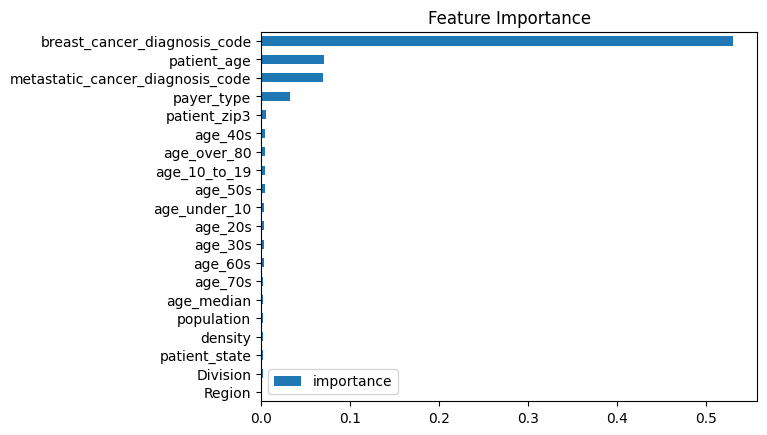

In [60]:
fi = pd.DataFrame(data=rf.feature_importances_[0:20],
             index=rf.feature_names_in_[0:20],
             columns=['importance'])
fi.sort_values('importance').plot(kind='barh', title='Feature Importance')
plt.show()

#K-cross Validations

In [68]:
from sklearn.model_selection import cross_val_score, KFold
from catboost import CatBoostRegressor
import numpy as np

# Define your CatBoostRegressor with desired parameters
ctb = CatBoostRegressor(
    random_state=42,
    verbose=False,
    eval_metric='RMSE'
)

# Define the number of folds
k = 10

# Define KFold cross-validation
kf = KFold(n_splits=k, shuffle=True, random_state=42)

# Perform cross-validation
rmse_scores = cross_val_score(ctb, X_train_selected, y_train, cv=kf, scoring='neg_root_mean_squared_error')

# Convert negative RMSE scores to positive
rmse_scores = np.abs(rmse_scores)

# Print RMSE scores for each fold
print("RMSE Scores for each fold:", rmse_scores)

# Print mean RMSE score
print("Mean RMSE:", np.mean(rmse_scores))


RMSE Scores for each fold: [86.45956308 90.55541372 78.51975666 84.98748736 86.1859783  84.64738375
 81.57663586 79.09993159 84.0188921  85.29062528]
Mean RMSE: 84.1341667707995


#Ensemble Learning

In [81]:
# 1. CatBoost(on selected features)
ctb = CatBoostRegressor(
      random_state=42,
    verbose=False,
    eval_metric='RMSE'
).fit(X_train_selected, y_train, eval_set=(X_test_selected, y_test), use_best_model=True)

rmse(y_test, ctb.predict(X_test_selected))

84.0478188508882

In [70]:
# 2. XGBoost
xgb = XGBRegressor(
    random_state=42,
    learning_rate=.03,
    max_depth=4
).fit(X_train_selected, y_train)
rmse(y_test, xgb.predict(X_test_selected))

84.1854834542411

In [72]:
# 3. LightGBM
lgbm = LGBMRegressor(
    random_state=42,
    learning_rate=.04,
    verbose=0
).fit(X_train_selected, y_train)
rmse(y_test, lgbm.predict(X_test_selected))

84.838978704833

In [73]:
# 6. Ada Boost
ada = AdaBoostRegressor(
    random_state=42,
    learning_rate=.0005
).fit(X_train_selected, y_train)
rmse(y_test, ada.predict(X_test_selected))

84.20693399529044

In [75]:
# 7. Extra Trees
et = ExtraTreesRegressor(
    random_state=42,
    max_depth=9
).fit(X_train_selected, y_train)
rmse(y_test, et.predict(X_test_selected))

84.352944186788

In [77]:
ctb

In [89]:
y_pred_test_ctb = ctb.predict(test_df_X)
y_pred_test_xg=xgb.predict(test_df_X)
y_pred_test_lgb=lgbm.predict(test_df_X)
y_pred_test_ada=ada.predict(test_df_X)
y_pred_test_extra=et.predict(test_df_X)

In [90]:
preds_combined = pd.DataFrame({
    'model1': y_pred_test_ctb,
    'model2': y_pred_test_xg,
    'model3': y_pred_test_lgb,
    'model4': y_pred_test_ada,
    'model5': y_pred_test_extra,

})

In [91]:
preds_combined

,model1,model2,model3,model4,model5
0,203.644831,181.054108,173.695707,195.497278,192.098185
1,54.193889,55.068192,48.061500,55.685847,43.561856
2,193.602288,186.310852,207.608881,195.497278,187.498706
3,222.973296,222.364105,208.469838,243.270125,214.821581
4,57.881766,61.374775,74.640042,51.096359,80.645475
...,...,...,...,...,...
5641,59.831316,50.964165,52.471405,55.810374,52.199547
5642,71.254689,65.903488,66.633723,52.227571,88.543911
5643,212.561052,209.121140,214.648730,231.743546,185.866767
5644,53.513859,56.870155,52.284731,55.810374,51.498290


In [92]:
mean_around_rows = preds_combined.mean(axis=1)

In [93]:
mean_around_rows

0       189.198022
1        51.314257
2       194.103601
3       222.379789
4        65.127683
           ...    
5641     54.255361
5642     68.912676
5643    210.788247
5644     53.995482
5645     55.496904
Length: 5646, dtype: float64